In [1]:
# coding=utf-8 
from __future__ import division
from scipy import integrate,stats,special
#from xlrd import open_workbook
import numpy as np
#import scipy as sp
import pylab as pl
import pytwalk
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import math
#import emcee
#import time
#import math
#from scipy.special import gamma
import corner
import seaborn as sns


#plt.style.use('seaborn-talk') # beautify the plots!
plt.style.use('classic')

In [2]:
# Load the diagnosed cases
raw_cases = pd.read_csv('/home/kernel/estParameters/covidMobility/Data/incidencia_casos_Allcdmx.csv')

# Load the population sizes of Alcaldias and Municipios
raw_population = pd.read_csv('/home/kernel/estParameters/covidMobility/Data/pop_Allcdmx.csv')

In [3]:
raw_population

,City,Delegacion_Municipio,Population
0,Ciudad de México,AZCAPOTZALCO,414711
1,Ciudad de México,COYOACAN,628063
2,Ciudad de México,CUAJIMALPA DE MORELOS,199224
3,Ciudad de México,GUSTAVO A. MADERO,1185772
4,Ciudad de México,IZTACALCO,384326
5,Ciudad de México,IZTAPALAPA,1815786
6,Ciudad de México,LA MAGDALENA CONTRERAS,239086
7,Ciudad de México,MILPA ALTA,137927
8,Ciudad de México,ALVARO OBREGON,726664
9,Ciudad de México,TLAHUAC,305076


In [4]:
initial_population = raw_population['Population']
#initial_population

In [5]:
NumPops=len(initial_population)
NumPops

16

In [6]:
initial_pop=initial_population.to_numpy()

In [7]:
#raw_cases

In [8]:
raw_incid = raw_cases.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

In [9]:
raw_incid

,Date,Azcapotzalco,Coyoacan,CuajimalpaDeMorelos,GustavoAMadero,Iztacalco,Iztapalapa,LaMagdalenaContreras,MilpaAlta,AlvaroObregon,Tlahuac,Tlalpan,Xochimilco,BenitoJuarez,Cuauhtemoc,MiguelHidalgo,VenustianoCarranza
0,27-02-2020,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,28-02-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,29-02-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,01-03-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,02-03-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,23-10-2020,86,128,7,192,65,78,39,39,124,96,147,17,50,48,75,117
240,24-10-2020,31,50,2,70,18,44,22,18,64,11,58,6,44,10,15,26
241,25-10-2020,12,19,3,20,6,28,4,3,17,2,26,5,13,17,6,10
242,26-10-2020,107,113,29,241,83,80,60,21,171,107,140,17,71,33,58,106


In [10]:
raw_incidence = raw_incid.drop('Date', axis=1)
print(raw_incidence.shape)
print(raw_incidence.shape[1])
save_results_to = 't-walk_AllCDMX1/'

(244, 16)
16


In [11]:
Sick  = raw_incidence["MiguelHidalgo"]
times = np.linspace(0.0,float(len(Sick))-1,len(Sick))

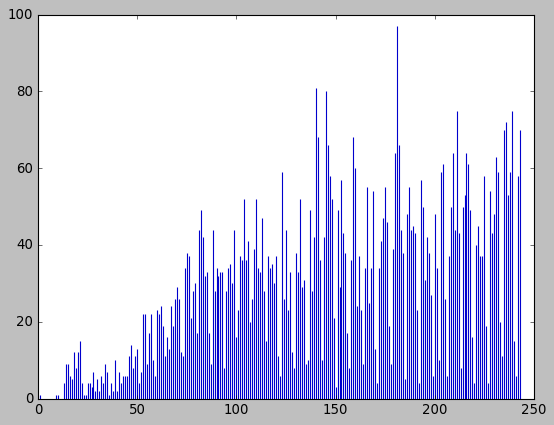

In [12]:
fig0= plt.figure(facecolor="white")
plt.stem(times, Sick, linefmt='mediumblue', markerfmt=" ",basefmt=" ")
#plt.stem(times, Deaths, linefmt='orangered',markerfmt=" ",use_line_collection = True)
plt.savefig(save_results_to + 'NewCases_MiguelHidalgo.eps')

In [13]:
Sick=raw_incidence.to_numpy()

In [14]:
Sick=np.transpose(raw_incidence.to_numpy())

In [15]:
print(Sick.shape)
print(Sick.shape[0])
print(Sick.shape[1])

(16, 244)
16
244


In [16]:
mobility_matrix_over_time=np.zeros((Sick.shape[0], Sick.shape[0],Sick.shape[1]+31))

In [17]:
print(mobility_matrix_over_time.shape)

(16, 16, 275)


In [18]:
# Load the Mobility matrices

# Mobility days in February
for i in range(27,30):
    name = str(i)+'02.csv'

    raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

    raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

    raw_mob=raw_mobility.drop('0', axis=1) 

    mobility_matrix_over_time[:,:,i-27] = raw_mob

In [19]:
# Mobility days in March
for i in range(1,32):

  name = str(i)+'03.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+2] = raw_mob

In [20]:
# Mobility days in April
for i in range(1,31):

  name = str(i)+'04.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+33] = raw_mob

In [21]:
# Mobility days in May
for i in range(1,32):

  name = str(i)+'05.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+63] = raw_mob

In [22]:
# Mobility days in June
for i in range(1,31):

  name = str(i)+'06.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+94] = raw_mob

In [23]:
# Mobility days in July
for i in range(1,32):

  name = str(i)+'07.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+124] = raw_mob

In [24]:
# Mobility days in Ago
for i in range(1,32):

  name = str(i)+'08.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+155] = raw_mob

In [25]:
# Mobility days in Sept
for i in range(1,31):

  name = str(i)+'09.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+186] = raw_mob

In [26]:
# Mobility days in Oct
for i in range(1,32):

  name = str(i)+'10.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+216] = raw_mob

In [27]:
# Mobility days in Nov
for i in range(1,28):

  name = str(i)+'11.csv'

  raw_mobility = pd.read_csv('/home/kernel/estParameters/covidMobility/Matrices_OD_AllCDMX/r_MatrizOD_'+name)

  raw_mobility = raw_mobility.rename(columns={"Fecha\ Clave":"Date", 
                                          "900002":"Azcapotzalco","900003":"Coyoacan",
                                          "900004":"CuajimalpaDeMorelos", "900005":"GustavoAMadero","900006":"Iztacalco",
                                          "900007":"Iztapalapa", "900008":"LaMagdalenaContreras","900009":"MilpaAlta",
                                          "900010":"AlvaroObregon", "900011":"Tlahuac","900012":"Tlalpan",
                                          "900013":"Xochimilco", "900014":"BenitoJuarez","900015":"Cuauhtemoc",
                                          "900016":"MiguelHidalgo", "900017":"VenustianoCarranza"
                                          })

  raw_mob=raw_mobility.drop('0', axis=1) 

  mobility_matrix_over_time[:,:,i+247] = raw_mob

In [28]:
mobility_matrix_over_time[:,:,0].shape

(16, 16)

In [29]:
NumDays      = Sick.shape[1]
N=np.zeros((NumDays,NumPops))
N[0,:].shape
initial_pop.shape

(16,)

In [30]:
MIN_CITY_FRACTION=0.6
EPSILON=1e+3

In [31]:
# Revisando model
def modelo(t,x,p):
#    print('t=',t)
#    print() 
#    N=np.zeros((NumDays,NumPops))
#    N_temp=np.zeros((NumDays,NumPops))
    for k in range(NumDays):
        N[k,:]=initial_population
    
    m=int(math.floor(t))
    if (m==NumDays):
        m=NumDays-1
#    print('m=',m)

  
    """
  model:SEAIRD
  
  Parameters:
  p[0]: beta_s
  p[1]: beta_a
  p[2]: rho proportion of asymptomatics and symp
  p[3]: alpha, duration of the infection=1/alpha
  p[4]: gamma recovery rate
  p[5]: theta
  
  State variables: SsEIQRP
  
  x[0]: Susceptibles
  x[1]: Exposeds
  x[2]: Asymp infected
  x[3]: Symp infected
    """
  
    fx = np.zeros(NumEqs*NumPops)

    for i in range(NumPops):

        prod_Sj=0
        prod_Si=0
        prod_Ej=0
        prod_Ei=0 
        prod_Aj=0
        prod_Ai=0        
        for j in range(NumPops):

            denom_j=N[m,j]- x[3+j*NumEqs]
            if(denom_j <=0.):
                denom_j=EPSILON
            prod_Sj=prod_Sj+mobility_matrix_over_time[i,j,m]*x[0+j*NumEqs]/ denom_j
            prod_Si=prod_Si+mobility_matrix_over_time[j,i,m]*x[0+i*NumEqs]
            
            prod_Ej=prod_Ej+mobility_matrix_over_time[i,j,m]*x[1+j*NumEqs]/denom_j
            prod_Ei=prod_Ei+mobility_matrix_over_time[j,i,m]*x[1+i*NumEqs]
            
            prod_Aj=prod_Aj+mobility_matrix_over_time[i,j,m]*x[2+j*NumEqs]/denom_j
            prod_Ai=prod_Ai+mobility_matrix_over_time[j,i,m]*x[2+i*NumEqs]            
        
        denom_i=N[m,i]- x[3+i*NumEqs]
        if(denom_i <=0.):
            denom_i=EPSILON
            
        fx[0+i*NumEqs] =  -(p[0]*x[3+i*NumEqs] + p[1]*x[2+i*NumEqs] )*x[0+i*NumEqs]/ \
        N[m,i] + p[5]*prod_Sj- p[5]*prod_Si/ denom_i
        
        fx[1+i*NumEqs] =  (p[0]*x[3+i*NumEqs] + p[1]*x[2+i*NumEqs] )*x[0+i*NumEqs]/ \
        N[m,i]  + p[5]*prod_Ej  - p[5]*prod_Ei /denom_i - p[3]*x[1+i*NumEqs]
        
        fx[2+i*NumEqs] =  (1-p[2])*p[3]*x[1+i*NumEqs] - p[4]*x[2+i*NumEqs] 
        + p[5]*prod_Aj - p[5]*prod_Ai/ denom_i
        
        fx[3+i*NumEqs] =  p[2]*p[3]*x[1+i*NumEqs] - p[4]*x[3+i*NumEqs]
        
        N[m,i]=N[m,i] + p[5]* np.sum(mobility_matrix_over_time[i,:,m], axis = 0) \
        - p[5]* np.sum(mobility_matrix_over_time[:,i,m], axis = 0)
        
        if(N[m,i] < MIN_CITY_FRACTION*initial_pop[i]):
            N[m,i] = MIN_CITY_FRACTION**initial_pop[i]
        
        

#    if(m==25):
#        print(N)    
#    input()     

   
    return fx

In [32]:
def modelo_pred(t,x,p):
#    print('t=',t)
#    print() 
    for k in range(n_pred):
        N[k,:]=initial_population
    
    m=int(math.floor(t))
    if (m==n_pred):
        m=n_pred-1
#    print('m=',m)

  
    """
  model:SEAIRD
  
  Parameters:
  p[0]: beta_s
  p[1]: beta_a
  p[2]: rho proportion of asymptomatics and symp
  p[3]: alpha, duration of the infection=1/alpha
  p[4]: gamma recovery rate
  p[5]: theta
  
  State variables: SsEIQRP
  
  x[0]: Susceptibles
  x[1]: Exposeds
  x[2]: Asymp infected
  x[3]: Symp infected
    """
  
    fx = np.zeros(NumEqs*NumPops)

    for i in range(NumPops):

        prod_Sj=0
        prod_Si=0
        prod_Ej=0
        prod_Ei=0 
        prod_Aj=0
        prod_Ai=0        
        for j in range(NumPops):

            denom_j=N[m,j]- x[3+j*NumEqs]
            if(denom_j <=0.):
                denom_j=EPSILON
            prod_Sj=prod_Sj+mobility_matrix_over_time[i,j,m]*x[0+j*NumEqs]/ denom_j
            prod_Si=prod_Si+mobility_matrix_over_time[j,i,m]*x[0+i*NumEqs]
            
            prod_Ej=prod_Ej+mobility_matrix_over_time[i,j,m]*x[1+j*NumEqs]/denom_j
            prod_Ei=prod_Ei+mobility_matrix_over_time[j,i,m]*x[1+i*NumEqs]
            
            prod_Aj=prod_Aj+mobility_matrix_over_time[i,j,m]*x[2+j*NumEqs]/denom_j
            prod_Ai=prod_Ai+mobility_matrix_over_time[j,i,m]*x[2+i*NumEqs]            
        
        denom_i=N[m,i]- x[3+i*NumEqs]
        if(denom_i <=0.):
            denom_i=EPSILON
            
        fx[0+i*NumEqs] =  -(p[0]*x[3+i*NumEqs] + p[1]*x[2+i*NumEqs] )*x[0+i*NumEqs]/ \
        N[m,i] + p[5]*prod_Sj- p[5]*prod_Si/ denom_i
        
        fx[1+i*NumEqs] =  (p[0]*x[3+i*NumEqs] + p[1]*x[2+i*NumEqs] )*x[0+i*NumEqs]/ \
        N[m,i]  + p[5]*prod_Ej  - p[5]*prod_Ei /denom_i - p[3]*x[1+i*NumEqs]
        
        fx[2+i*NumEqs] =  (1-p[2])*p[3]*x[1+i*NumEqs] - p[4]*x[2+i*NumEqs] 
        + p[5]*prod_Aj - p[5]*prod_Ai/ denom_i
        
        fx[3+i*NumEqs] =  p[2]*p[3]*x[1+i*NumEqs] - p[4]*x[3+i*NumEqs]
        
        N[m,i]=N[m,i] + p[5]* np.sum(mobility_matrix_over_time[i,:,m], axis = 0) \
        - p[5]* np.sum(mobility_matrix_over_time[:,i,m], axis = 0)
        
        if(N[m,i] < MIN_CITY_FRACTION*initial_pop[i]):
            N[m,i] = MIN_CITY_FRACTION**initial_pop[i]
        
        

   
    return fx

In [33]:
# Initial conditions

# p[6]: E(0)
# p[7]: A(0)
# p[8]: I(0)


def solve(p):
    x0 = np.zeros(NumEqs*NumPops)
#    print(x0.shape)
#    print()
    for i in range(NumPops):
          
        x0[0+i*NumEqs]=initial_population[i]-(p[6 +i*NumEqs  ] + p[7+i*NumEqs] + p[8+i*NumEqs])
        x0[1+i*NumEqs]=p[6 +i*NumEqs]
        x0[2+i*NumEqs]=p[7 +i*NumEqs]
        x0[3+i*NumEqs]=p[8 +i*NumEqs]

     
    result_I = np.zeros((NumPops,len(ttime)))
    
#    soln = integrate.odeint(modelo,x0,ttime,args=(p,))            
    soln = integrate.solve_ivp(lambda t,x: modelo(t, x, p), \
                                [0,NumDays],x0,method='LSODA', \
                                vectorized=True,t_eval=ttime)
    for i in range(NumPops):
        result_I[i]=soln.y[3+i*NumEqs][:]

    
    return result_I

In [34]:
def solve_pred(p):
    x0 = np.zeros(NumEqs*NumPops) 
    for i in range(NumPops):
          
        x0[0+i*NumEqs]=initial_population[i]-(p[6 +i*NumEqs  ] + p[7+i*NumEqs] + p[8+i*NumEqs])
        x0[1+i*NumEqs]=p[6 +i*NumEqs]
        x0[2+i*NumEqs]=p[7 +i*NumEqs]
        x0[3+i*NumEqs]=p[8 +i*NumEqs]

     
    result_I = np.zeros((NumPops,len(times_pred)))
    
#    soln = integrate.odeint(modelo,x0,ttime,args=(p,))            
    soln = integrate.solve_ivp(lambda t,x: modelo_pred(t, x, p),
                                [0,n_pred],x0,method='LSODA', 
                                vectorized=True,t_eval=times_pred)
    for i in range(NumPops):
        result_I[i]=soln.y[3+i*NumEqs][:]

    
    return result_I

In [35]:
#p[9]: Overdispersion parameter of Negative Binomial Distribution
def energy(p):
    if support(p):
        my_soln_I = solve(p)        

        log_likelihood=np.zeros(NumPops)
        for i in range(NumPops):
            log_likelihood[i] = np.sum(Sick[i]*np.log(my_soln_I[i,:]) \
                            -(p[9+i*NumEqs] + Sick[i])*np.log(p[9+i*NumEqs] + my_soln_I[i,:]) ) \
             -len(Sick[i])*(-p[9+i*NumEqs]*np.log(p[9+i*NumEqs])+ np.log(special.gamma(p[9+i*NumEqs]) )  )


       #log_likelihood = -np.sum(np.linalg.norm(my_soln*N-flu_data))**2/10.0**2
       # gamma distribution parameters for p[0] = beta
        k0 = 1.0
        theta0 = 1.0
        # gamma distribution parameters for p[1] = qu
        k1 = 1.0
        theta1 = 1.0
        # gamma distribution parameters for p[2] = delta
        k2 = 1.0
        theta2 = 1.0
        # gamma distribution parameters for p[3] = alpha
        k3 = 1.0
        theta3 = 1.0
        # gamma distribution parameters for p[4] = gamma
        k4 = 1.0
        theta4 = 1.0
        # gamma distribution parameters for p[5] = sigma
        k5 = 1.0
        theta5 = 1.0
        
        k6 = 1.0
        theta6 = 10.0
        # gamma distribution parameters for p[4] = gamma
        k7 = 1.0
        theta7 = 10.0
        # gamma distribution parameters for p[5] = sigma
        k8 = 7.5
        theta8 = 1.
        
        k9 = 7.5
        theta9 = 1.0
        
        k13 = 7.5
        theta13 = 1.0

        k17 = 7.5
        theta17 = 1.0
        
        k21 = 7.5
        theta21 = 1.0
        
        k25 = 7.5
        theta25 = 1.0 
        
        k29 = 7.5
        theta29 = 1.0 
        
        k33 = 7.5
        theta33 = 1.0 
        
        k37 = 7.5
        theta37 = 1.0 
        
        k41 = 7.5
        theta41 = 1.0
        
        k45 = 7.5
        theta45 = 1.0
        
        k49 = 7.5
        theta49 = 1.0
        
        k53 = 7.5
        theta53 = 1.0 
        
        k57 = 7.5
        theta57 = 1.0 
        
        k61 = 7.5
        theta61 = 1.0 
        
        k65 = 7.5
        theta65 = 1.0 
        
        k69 = 7.5
        theta69 = 1.0        

    
        a0 = ss.lognorm.pdf(p[0], 1.)
        a1 = ss.lognorm.pdf(p[1], 1.)
#        a0 = (k0-1)*np.log(p[0])- (p[0]/theta0)
#        a1 = (k1-1)*np.log(p[1])- (p[1]/theta1)
        a2 = (k2-1)*np.log(p[2])- (p[2]/theta2) 
        a3 = (k3-1)*np.log(p[3])- (p[3]/theta3)
        a4 = (k4-1)*np.log(p[4])- (p[4]/theta4)
        a5 = ss.uniform.pdf(p[5], 0.0, 1.0)
#        a5 = (k5-1)*np.log(p[5])- (p[5]/theta5)
        a6 = ss.uniform.pdf(p[6], 0., 1e3)
        a7 = ss.uniform.pdf(p[7], 0., 1e3)
        a8 = ss.uniform.pdf(p[8], 0., 1e2)
        
        a10 = ss.uniform.pdf(p[10], 0., 1e3)
        a11 = ss.uniform.pdf(p[11], 0., 1e3)
        a12 = ss.uniform.pdf(p[12], 0., 1e2)
        
        a14 = ss.uniform.pdf(p[14], 0., 1e3)
        a15 = ss.uniform.pdf(p[15], 0., 1e3)
        a16 = ss.uniform.pdf(p[16], 0., 1e2)
        
        a18 = ss.uniform.pdf(p[18], 0., 1e3)
        a19 = ss.uniform.pdf(p[19], 0., 1e3)
        a20 = ss.uniform.pdf(p[20], 0., 1e2) 
        
        a22 = ss.uniform.pdf(p[22], 0., 1e3)
        a23 = ss.uniform.pdf(p[23], 0., 1e3)
        a24 = ss.uniform.pdf(p[24], 0., 1e2) 
        
        a26 = ss.uniform.pdf(p[26], 0., 1e3)
        a27 = ss.uniform.pdf(p[27], 0., 1e3)
        a28 = ss.uniform.pdf(p[28], 0., 1e2) 
        
        a30 = ss.uniform.pdf(p[30], 0., 1e3)
        a31 = ss.uniform.pdf(p[31], 0., 1e3)
        a32 = ss.uniform.pdf(p[32], 0., 1e2)
        
        a34 = ss.uniform.pdf(p[34], 0., 1e3)
        a35 = ss.uniform.pdf(p[35], 0., 1e3)
        a36 = ss.uniform.pdf(p[36], 0., 1e2)
        
        a38 = ss.uniform.pdf(p[38], 0., 1e3)
        a39 = ss.uniform.pdf(p[39], 0., 1e3)
        a40 = ss.uniform.pdf(p[40], 0., 1e2)
        
        a42 = ss.uniform.pdf(p[42], 0., 1e3)
        a43 = ss.uniform.pdf(p[43], 0., 1e3)
        a44 = ss.uniform.pdf(p[44], 0., 1e2)
        
        a46 = ss.uniform.pdf(p[46], 0., 1e3)
        a47 = ss.uniform.pdf(p[47], 0., 1e3)
        a48 = ss.uniform.pdf(p[48], 0., 1e2)
        
        a50 = ss.uniform.pdf(p[50], 0., 1e3)
        a51 = ss.uniform.pdf(p[51], 0., 1e3)
        a52 = ss.uniform.pdf(p[52], 0., 1e2)
        
        a54 = ss.uniform.pdf(p[54], 0., 1e3)
        a55 = ss.uniform.pdf(p[55], 0., 1e3)
        a56 = ss.uniform.pdf(p[56], 0., 1e2) 
        
        a58 = ss.uniform.pdf(p[58], 0., 1e3)
        a59 = ss.uniform.pdf(p[59], 0., 1e3)
        a60 = ss.uniform.pdf(p[60], 0., 1e2) 
        
        a62 = ss.uniform.pdf(p[62], 0., 1e3)
        a63 = ss.uniform.pdf(p[63], 0., 1e3)
        a64 = ss.uniform.pdf(p[64], 0., 1e2) 
        
        a66 = ss.uniform.pdf(p[66], 0., 1e3)
        a67 = ss.uniform.pdf(p[67], 0., 1e3)
        a68 = ss.uniform.pdf(p[68], 0., 1e2)  
        
        
        a9  = (k9-1)*np.log(p[9])  - (p[9]/theta9)
        a13 = (k13-1)*np.log(p[13])- (p[13]/theta13)
        a17 = (k17-1)*np.log(p[17])- (p[17]/theta17)
        a21 = (k21-1)*np.log(p[21])- (p[21]/theta21)
        a25 = (k25-1)*np.log(p[25])- (p[25]/theta25)
        a29 = (k29-1)*np.log(p[29])- (p[29]/theta29)
        a33 = (k33-1)*np.log(p[33])- (p[33]/theta33)
        a37 = (k37-1)*np.log(p[37])- (p[37]/theta37)
        a41 = (k41-1)*np.log(p[41])- (p[41]/theta41)
        a45 = (k45-1)*np.log(p[45])- (p[45]/theta45)
        a49 = (k49-1)*np.log(p[49])- (p[49]/theta49)
        a53 = (k53-1)*np.log(p[53])- (p[53]/theta53)
        a57 = (k57-1)*np.log(p[57])- (p[57]/theta57)
        a61 = (k61-1)*np.log(p[61])- (p[61]/theta61)
        a65 = (k65-1)*np.log(p[65])- (p[65]/theta65)
        a69 = (k69-1)*np.log(p[69])- (p[69]/theta69)
        
#        a8 = ss.uniform.pdf(p[8], 0., 0.3)
#        a5 = (k5-1)*np.log(p[5])- (p[5]/theta5)
#        a6 = (k6-1)*np.log(p[6])- (p[6]/theta6)
#        a7 = (k7-1)*np.log(p[7])- (p[7]/theta7)

 
        log_prior = a0  + a1  + a2  + a3  + a4  + a5  + a6  + \
                    a7  + a8  + a9  + a10 + a11 + a12 + a13 + \
                    a14 + a15 + a16 + a17 + a18 + a19 + a20 + \
                    a21 + a22 + a23 + a24 + a25 + a26 + a27 + \
                    a28 + a29 + a30 + a31 + a32 + a33 + a34 + \
                    a35 + a36 + a37 + a38 + a39 + a40 + a41 + \
                    a42 + a43 + a44 + a45 + a46 + a47 + a48 + \
                    a49 + a50 + a51 + a52 + a53 + a54 + a55 + \
                    a56 + a57 + a58 + a59 + a60 + a61 + a62 + \
                    a63 + a64 + a65 + a66 + a67 + a68 + a69     
        
        
        return -sum(log_likelihood) - log_prior
    return -np.infty

In [36]:
def support(p):
    rt = True
    rt &= (0.0 < p[0] < 0.5)  #beta_s
    rt &= (0.0 < p[1] < 0.5)  #beta_a
    rt &= (0.0 < p[2] < 0.4)  #rho
    rt &= (0.1 < p[3] < 0.5)  #alpha
    rt &= (0.05   < p[4] < 0.5)  #gamma
    rt &= (0.0 < p[5] < 1.0)  #theta
    for i in range(NumPops):
        
        rt &= (0.0 < p[6 +i*NumEqs] < 1e3 ) #E0
        rt &= (0.0 < p[7 +i*NumEqs] < 1e3)  #A0
        rt &= (0.0 < p[8 +i*NumEqs] < 1e2)  #I0
        rt &= (5e-9< p[9 +i*NumEqs] < 0.3)  #omega

    return rt

In [37]:
def init():
    p = np.zeros(NumParams)
    p[0] = np.random.uniform(low=0.0,high=0.5) #beta_s
    p[1] = np.random.uniform(low=0.0,high=0.5) #beta_a
    p[2] = np.random.uniform(low=0.0,high=0.4) #rho
    p[3] = np.random.uniform(low=0.1,high=0.5) #alpha
    p[4] = np.random.uniform(low=0.05  ,high=0.5) #gamma
    p[5] = np.random.uniform(low=0.0,high=1.0) #theta
    for i in range(NumPops):
        
        p[6+i*NumEqs] = np.random.uniform(low=0.0,high=1e3) #E0
        p[7+i*NumEqs] = np.random.uniform(low=0.0,high=1e3) #A0
        p[8+i*NumEqs] = np.random.uniform(low=0.0,high=1e2) #I0
        p[9+i*NumEqs] = np.random.uniform(low=5e-9,high=0.3) #omega    

    return p

In [38]:
def euclidean(v1, v2):
    return sum((q1-q2)**2 for q1, q2 in zip(v1, v2))**.5

In [39]:
TotalNumIter =     256
burnin       =     128
LastNumIter  =      20
NumEqs       =       4
NumParams    =      70

NumDays      = Sick.shape[1]

In [40]:
ttime  = np.linspace(0.0,float(Sick.shape[1])-1,Sick.shape[1])
t_pred = np.linspace(0.0,float(Sick.shape[1])-1,Sick.shape[1])
times_pred = np.linspace(0.0,274,275)

In [41]:
n_days=Sick.shape[1]
n_pred=len(times_pred)
#n_pred
#n_days

In [42]:
# Start t-walk
sir = pytwalk.pytwalk(n=NumParams,U=energy,Supp=support)
sir.Run(T=TotalNumIter,x0=init(),xp0=init())

pytwalk: Running the twalk with 100 iterations .  Sat, 13 Feb 2021, 19:10:56.
       Finish by Sat, 13 Feb 2021, 19:33.
pytwalk:         16 iterations so far. Finish by Sat, 13 Feb 2021, 19:20.
pytwalk:         64 iterations so far. Finish in approx. 2 min and 36 sec.


/home/kernel/estParameters/covidMobility/pytwalk.py:324: RuntimeWarning: overflow encountered in exp
  A = exp(u - u_prop)


pytwalk:         96 iterations so far. Finish in approx. 19 sec.
pytwalk: finished, Sat, 13 Feb 2021, 19:18:51.


1

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.24074074 0.02222222 0.         0.        ]
Global acceptance rate: 0.14000
AutoMaxlag: Warning: maxlag= 66 > min(T//2,maxmaxlag=20000), fixing it to 25
Integrated Autocorrelation Time:    19.8, IAT/n:     0.3


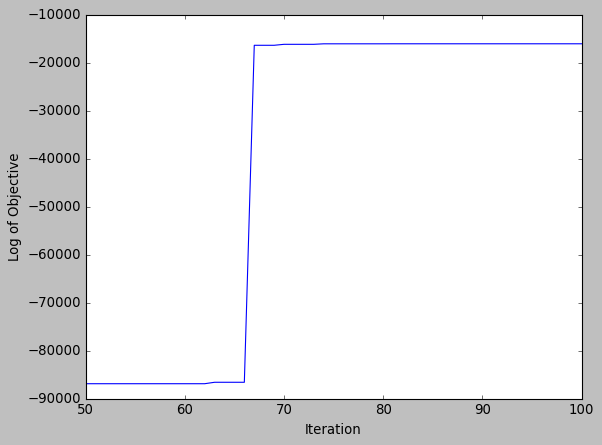

In [43]:
fig0= plt.figure(facecolor="white")
ax0 = plt.subplot(111)
sir.Ana(start=burnin)
plt.savefig(save_results_to + 'trace_plot.eps')

In [44]:
qq = sir.Output[sir.Output[:,-1].argsort()] # MAP
#my_soln_I = solve(qq[0,:]) # solve for MAP

N=np.zeros((n_pred,NumPops))
#N[0,:].shape

my_soln_I = solve_pred(qq[0,:]) # solve for MAP

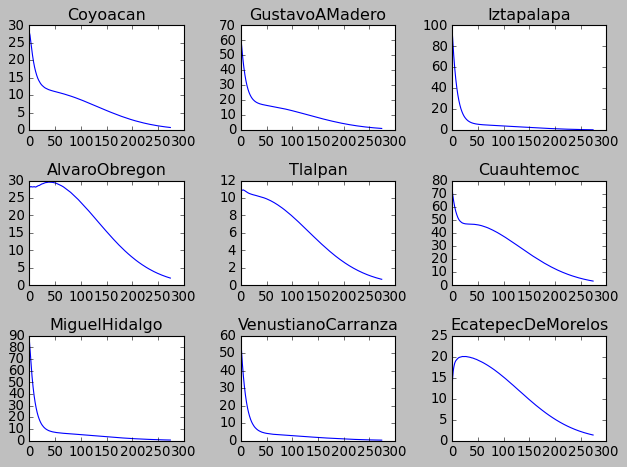

In [45]:
fig, axs = plt.subplots(3, 3)
axs[0, 0].plot(times_pred,my_soln_I[0],'b')
axs[0, 0].set_title('Coyoacan')

axs[0, 1].plot(times_pred,my_soln_I[1],'b')
axs[0, 1].set_title('GustavoAMadero')

axs[0, 2].plot(times_pred,my_soln_I[2],'b')
axs[0, 2].set_title('Iztapalapa')

axs[1, 0].plot(times_pred,my_soln_I[3],'b')
axs[1, 0].set_title('AlvaroObregon')

axs[1, 1].plot(times_pred,my_soln_I[4],'b')
axs[1, 1].set_title('Tlalpan')

axs[1, 2].plot(times_pred,my_soln_I[5],'b')
axs[1, 2].set_title('Cuauhtemoc')

axs[2, 0].plot(times_pred,my_soln_I[6],'b')
axs[2, 0].set_title('MiguelHidalgo')

axs[2, 1].plot(times_pred,my_soln_I[7],'b')
axs[2, 1].set_title('VenustianoCarranza')

axs[2, 2].plot(times_pred,my_soln_I[8],'b')
axs[2, 2].set_title('EcatepecDeMorelos')
plt.tight_layout()
plt.savefig(save_results_to +'First9Alcaldias.eps')

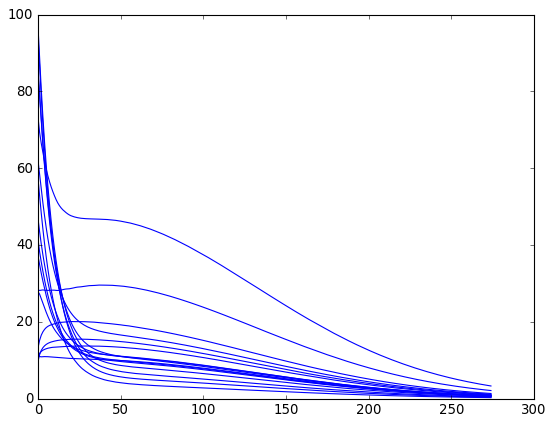

In [46]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
qq = sir.Output[sir.Output[:,-1].argsort()] # MAP
my_soln_I = solve_pred(qq[0,:]) # solve for MAP
ax2.plot(times_pred,np.transpose(my_soln_I),'b')
plt.savefig(save_results_to + 'MAP.eps')

In [47]:
#ppc_samples_I = np.zeros((LastNumIter,NumPops,len(times)))
ppc_samples_I = np.zeros((LastNumIter,NumPops,len(times_pred)))
#result_I = np.zeros((NumPops,len(ttime)))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

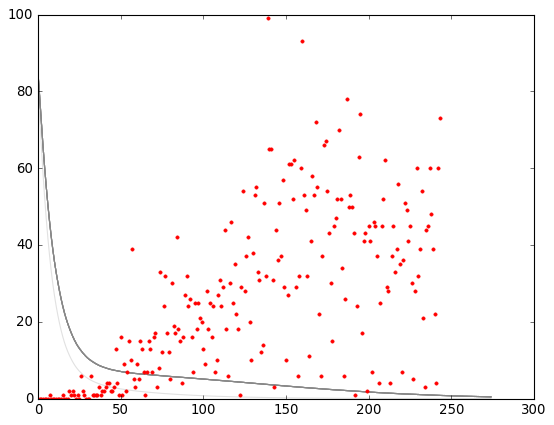

In [48]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
for k in np.arange(LastNumIter): # last 1000 samples
    ppc_samples_I[k]= solve_pred(sir.Output[-k,:])
#        sample_s, sample_Q,sample_P = solve(sir.Output[-k,:]) 
    ax2.plot(times_pred,np.transpose(ppc_samples_I[k,6,:]),"#888888", alpha=.25) 

ax2.plot(ttime,np.transpose(Sick[6,:]),'r.')
plt.savefig(save_results_to + 'data_vs_samples.eps')

In [49]:
samples = sir.Output[burnin:,:-1]  # to make plot prior vs posterior
#samples = sir.Output[-LastNumIter:,:-1]
map = qq[0,:-1]

In [50]:
samples.shape

(51, 70)

In [51]:
median_ppc_I = np.percentile(ppc_samples_I,q=50.0,axis=0)

In [52]:
CriL_ppc_I = np.percentile(ppc_samples_I,q=2.5,axis=0)
CriU_ppc_I = np.percentile(ppc_samples_I,q=97.5,axis=0)

In [53]:
median_ppc_beta_s = np.median(samples[:,0],axis=0)
median_ppc_beta_a = np.median(samples[:,1],axis=0)
median_ppc_rho    = np.median(samples[:,2],axis=0)
median_ppc_alpha  = np.median(samples[:,3],axis=0)
median_ppc_gamma  = np.median(samples[:,4],axis=0)
median_ppc_theta  = np.median(samples[:,5],axis=0)

In [54]:
median_ppc_E0     = np.zeros(NumPops)
median_ppc_A0     = np.zeros(NumPops)
median_ppc_I0     = np.zeros(NumPops)
median_ppc_omega  = np.zeros(NumPops)
for i in range(NumPops):
    median_ppc_E0[i]     = np.median(samples[:,6+i*NumEqs],axis=0)
    median_ppc_A0[i]     = np.median(samples[:,7+i*NumEqs],axis=0)
    median_ppc_I0[i]     = np.median(samples[:,8+i*NumEqs],axis=0)
    median_ppc_omega[i]  = np.median(samples[:,9+i*NumEqs],axis=0)

In [55]:
median_ppc_E0.shape

(16,)

In [56]:
q_m = np.array([np.percentile(samples[:,0],q=50.,axis=0),
                np.percentile(samples[:,1],q=50.,axis=0),
                np.percentile(samples[:,2],q=50.,axis=0),
                np.percentile(samples[:,3],q=50.,axis=0),
                np.percentile(samples[:,4],q=50.,axis=0),
                np.percentile(samples[:,5],q=50.,axis=0),
                np.percentile(samples[:,6],q=50.,axis=0),
                np.percentile(samples[:,7],q=50.,axis=0),
                np.percentile(samples[:,8],q=50.,axis=0),
                np.percentile(samples[:,9],q=50.,axis=0),
                np.percentile(samples[:,10],q=50.,axis=0), 
                np.percentile(samples[:,11],q=50.,axis=0),
                np.percentile(samples[:,12],q=50.,axis=0),
                np.percentile(samples[:,13],q=50.,axis=0),
                np.percentile(samples[:,14],q=50.,axis=0),
                np.percentile(samples[:,15],q=50.,axis=0),
                np.percentile(samples[:,16],q=50.,axis=0),
                np.percentile(samples[:,17],q=50.,axis=0),
                np.percentile(samples[:,18],q=50.,axis=0),
                np.percentile(samples[:,19],q=50.,axis=0),
                np.percentile(samples[:,20],q=50.,axis=0),  
                np.percentile(samples[:,21],q=50.,axis=0),
                np.percentile(samples[:,22],q=50.,axis=0),
                np.percentile(samples[:,23],q=50.,axis=0),
                np.percentile(samples[:,24],q=50.,axis=0),
                np.percentile(samples[:,25],q=50.,axis=0),
                np.percentile(samples[:,26],q=50.,axis=0),
                np.percentile(samples[:,27],q=50.,axis=0),
                np.percentile(samples[:,28],q=50.,axis=0),
                np.percentile(samples[:,29],q=50.,axis=0),
                np.percentile(samples[:,30],q=50.,axis=0), 
                np.percentile(samples[:,31],q=50.,axis=0),
                np.percentile(samples[:,32],q=50.,axis=0),
                np.percentile(samples[:,33],q=50.,axis=0),
                np.percentile(samples[:,34],q=50.,axis=0),
                np.percentile(samples[:,35],q=50.,axis=0),
                np.percentile(samples[:,36],q=50.,axis=0),
                np.percentile(samples[:,37],q=50.,axis=0),
                np.percentile(samples[:,38],q=50.,axis=0),
                np.percentile(samples[:,39],q=50.,axis=0),
                np.percentile(samples[:,40],q=50.,axis=0),
                np.percentile(samples[:,41],q=50.,axis=0),
                np.percentile(samples[:,42],q=50.,axis=0),
                np.percentile(samples[:,43],q=50.,axis=0),
                np.percentile(samples[:,44],q=50.,axis=0),
                np.percentile(samples[:,45],q=50.,axis=0),
                np.percentile(samples[:,46],q=50.,axis=0),
                np.percentile(samples[:,47],q=50.,axis=0),
                np.percentile(samples[:,48],q=50.,axis=0),
                np.percentile(samples[:,49],q=50.,axis=0),
                np.percentile(samples[:,50],q=50.,axis=0), 
                np.percentile(samples[:,51],q=50.,axis=0),
                np.percentile(samples[:,52],q=50.,axis=0),
                np.percentile(samples[:,53],q=50.,axis=0),
                np.percentile(samples[:,54],q=50.,axis=0),
                np.percentile(samples[:,55],q=50.,axis=0),
                np.percentile(samples[:,56],q=50.,axis=0),
                np.percentile(samples[:,57],q=50.,axis=0),
                np.percentile(samples[:,58],q=50.,axis=0),
                np.percentile(samples[:,59],q=50.,axis=0),
                np.percentile(samples[:,60],q=50.,axis=0),  
                np.percentile(samples[:,61],q=50.,axis=0),
                np.percentile(samples[:,62],q=50.,axis=0),
                np.percentile(samples[:,63],q=50.,axis=0),
                np.percentile(samples[:,64],q=50.,axis=0),
                np.percentile(samples[:,65],q=50.,axis=0),
                np.percentile(samples[:,66],q=50.,axis=0),
                np.percentile(samples[:,67],q=50.,axis=0),
                np.percentile(samples[:,68],q=50.,axis=0),
                np.percentile(samples[:,69],q=50.,axis=0),              
               ])





q_CriL = np.array([np.percentile(samples[:,0],q=2.5,axis=0),
                np.percentile(samples[:,1],q=2.5,axis=0),
                np.percentile(samples[:,2],q=2.5,axis=0),
                np.percentile(samples[:,3],q=2.5,axis=0),
                np.percentile(samples[:,4],q=2.5,axis=0),
                np.percentile(samples[:,5],q=2.5,axis=0),
                np.percentile(samples[:,6],q=2.5,axis=0),
                np.percentile(samples[:,7],q=2.5,axis=0),
                np.percentile(samples[:,8],q=2.5,axis=0),
                np.percentile(samples[:,9],q=2.5,axis=0),
                np.percentile(samples[:,10],q=2.5,axis=0), 
                np.percentile(samples[:,11],q=2.5,axis=0),
                np.percentile(samples[:,12],q=2.5,axis=0),
                np.percentile(samples[:,13],q=2.5,axis=0),
                np.percentile(samples[:,14],q=2.5,axis=0),
                np.percentile(samples[:,15],q=2.5,axis=0),
                np.percentile(samples[:,16],q=2.5,axis=0),
                np.percentile(samples[:,17],q=2.5,axis=0),
                np.percentile(samples[:,18],q=2.5,axis=0),
                np.percentile(samples[:,19],q=2.5,axis=0),
                np.percentile(samples[:,20],q=2.5,axis=0),  
                np.percentile(samples[:,21],q=2.5,axis=0),
                np.percentile(samples[:,22],q=2.5,axis=0),
                np.percentile(samples[:,23],q=2.5,axis=0),
                np.percentile(samples[:,24],q=2.5,axis=0),
                np.percentile(samples[:,25],q=2.5,axis=0),
                np.percentile(samples[:,26],q=2.5,axis=0),
                np.percentile(samples[:,27],q=2.5,axis=0),
                np.percentile(samples[:,28],q=2.5,axis=0),
                np.percentile(samples[:,29],q=2.5,axis=0),
                np.percentile(samples[:,30],q=2.5,axis=0), 
                np.percentile(samples[:,31],q=2.5,axis=0),
                np.percentile(samples[:,32],q=2.5,axis=0),
                np.percentile(samples[:,33],q=2.5,axis=0),
                np.percentile(samples[:,34],q=2.5,axis=0),
                np.percentile(samples[:,35],q=2.5,axis=0),
                np.percentile(samples[:,36],q=2.5,axis=0),
                np.percentile(samples[:,37],q=2.5,axis=0),
                np.percentile(samples[:,38],q=2.5,axis=0),
                np.percentile(samples[:,39],q=2.5,axis=0),
                np.percentile(samples[:,40],q=2.5,axis=0),
                np.percentile(samples[:,41],q=2.5,axis=0),
                np.percentile(samples[:,42],q=2.5,axis=0),
                np.percentile(samples[:,43],q=2.5,axis=0),
                np.percentile(samples[:,44],q=2.5,axis=0),
                np.percentile(samples[:,45],q=2.5,axis=0),
                np.percentile(samples[:,46],q=2.5,axis=0),
                np.percentile(samples[:,47],q=2.5,axis=0),
                np.percentile(samples[:,48],q=2.5,axis=0),
                np.percentile(samples[:,49],q=2.5,axis=0),
                np.percentile(samples[:,50],q=2.5,axis=0), 
                np.percentile(samples[:,51],q=2.5,axis=0),
                np.percentile(samples[:,52],q=2.5,axis=0),
                np.percentile(samples[:,53],q=2.5,axis=0),
                np.percentile(samples[:,54],q=2.5,axis=0),
                np.percentile(samples[:,55],q=2.5,axis=0),
                np.percentile(samples[:,56],q=2.5,axis=0),
                np.percentile(samples[:,57],q=2.5,axis=0),
                np.percentile(samples[:,58],q=2.5,axis=0),
                np.percentile(samples[:,59],q=2.5,axis=0),
                np.percentile(samples[:,60],q=2.5,axis=0),  
                np.percentile(samples[:,61],q=2.5,axis=0),
                np.percentile(samples[:,62],q=2.5,axis=0),
                np.percentile(samples[:,63],q=2.5,axis=0),
                np.percentile(samples[:,64],q=2.5,axis=0),
                np.percentile(samples[:,65],q=2.5,axis=0),
                np.percentile(samples[:,66],q=2.5,axis=0),
                np.percentile(samples[:,67],q=2.5,axis=0),
                np.percentile(samples[:,68],q=2.5,axis=0),
                np.percentile(samples[:,69],q=2.5,axis=0),              
               ])





q_CriU = np.array([np.percentile(samples[:,0],q=97.5,axis=0),
                np.percentile(samples[:,1],q=97.5,axis=0),
                np.percentile(samples[:,2],q=97.5,axis=0),
                np.percentile(samples[:,3],q=97.5,axis=0),
                np.percentile(samples[:,4],q=97.5,axis=0),
                np.percentile(samples[:,5],q=97.5,axis=0),
                np.percentile(samples[:,6],q=97.5,axis=0),
                np.percentile(samples[:,7],q=97.5,axis=0),
                np.percentile(samples[:,8],q=97.5,axis=0),
                np.percentile(samples[:,9],q=97.5,axis=0),
                np.percentile(samples[:,10],q=97.5,axis=0), 
                np.percentile(samples[:,11],q=97.5,axis=0),
                np.percentile(samples[:,12],q=97.5,axis=0),
                np.percentile(samples[:,13],q=97.5,axis=0),
                np.percentile(samples[:,14],q=97.5,axis=0),
                np.percentile(samples[:,15],q=97.5,axis=0),
                np.percentile(samples[:,16],q=97.5,axis=0),
                np.percentile(samples[:,17],q=97.5,axis=0),
                np.percentile(samples[:,18],q=97.5,axis=0),
                np.percentile(samples[:,19],q=97.5,axis=0),
                np.percentile(samples[:,20],q=97.5,axis=0),  
                np.percentile(samples[:,21],q=97.5,axis=0),
                np.percentile(samples[:,22],q=97.5,axis=0),
                np.percentile(samples[:,23],q=97.5,axis=0),
                np.percentile(samples[:,24],q=97.5,axis=0),
                np.percentile(samples[:,25],q=97.5,axis=0),
                np.percentile(samples[:,26],q=97.5,axis=0),
                np.percentile(samples[:,27],q=97.5,axis=0),
                np.percentile(samples[:,28],q=97.5,axis=0),
                np.percentile(samples[:,29],q=97.5,axis=0),
                np.percentile(samples[:,30],q=97.5,axis=0), 
                np.percentile(samples[:,31],q=97.5,axis=0),
                np.percentile(samples[:,32],q=97.5,axis=0),
                np.percentile(samples[:,33],q=97.5,axis=0),
                np.percentile(samples[:,34],q=97.5,axis=0),
                np.percentile(samples[:,35],q=97.5,axis=0),
                np.percentile(samples[:,36],q=97.5,axis=0),
                np.percentile(samples[:,37],q=97.5,axis=0),
                np.percentile(samples[:,38],q=97.5,axis=0),
                np.percentile(samples[:,39],q=97.5,axis=0),
                np.percentile(samples[:,40],q=97.5,axis=0),
                np.percentile(samples[:,41],q=97.5,axis=0),
                np.percentile(samples[:,42],q=97.5,axis=0),
                np.percentile(samples[:,43],q=97.5,axis=0),
                np.percentile(samples[:,44],q=97.5,axis=0),
                np.percentile(samples[:,45],q=97.5,axis=0),
                np.percentile(samples[:,46],q=97.5,axis=0),
                np.percentile(samples[:,47],q=97.5,axis=0),
                np.percentile(samples[:,48],q=97.5,axis=0),
                np.percentile(samples[:,49],q=97.5,axis=0),
                np.percentile(samples[:,50],q=97.5,axis=0), 
                np.percentile(samples[:,51],q=97.5,axis=0),
                np.percentile(samples[:,52],q=97.5,axis=0),
                np.percentile(samples[:,53],q=97.5,axis=0),
                np.percentile(samples[:,54],q=97.5,axis=0),
                np.percentile(samples[:,55],q=97.5,axis=0),
                np.percentile(samples[:,56],q=97.5,axis=0),
                np.percentile(samples[:,57],q=97.5,axis=0),
                np.percentile(samples[:,58],q=97.5,axis=0),
                np.percentile(samples[:,59],q=97.5,axis=0),
                np.percentile(samples[:,60],q=97.5,axis=0),  
                np.percentile(samples[:,61],q=97.5,axis=0),
                np.percentile(samples[:,62],q=97.5,axis=0),
                np.percentile(samples[:,63],q=97.5,axis=0),
                np.percentile(samples[:,64],q=97.5,axis=0),
                np.percentile(samples[:,65],q=97.5,axis=0),
                np.percentile(samples[:,66],q=97.5,axis=0),
                np.percentile(samples[:,67],q=97.5,axis=0),
                np.percentile(samples[:,68],q=97.5,axis=0),
                np.percentile(samples[:,69],q=97.5,axis=0),              
               ])

In [57]:
my_Soln_I  = solve_pred(q_m)    
CriL_Ppc_I = solve_pred(q_CriL)
CriU_Ppc_I = solve_pred(q_CriU)

In [58]:
my_Soln_I.shape

(16, 275)

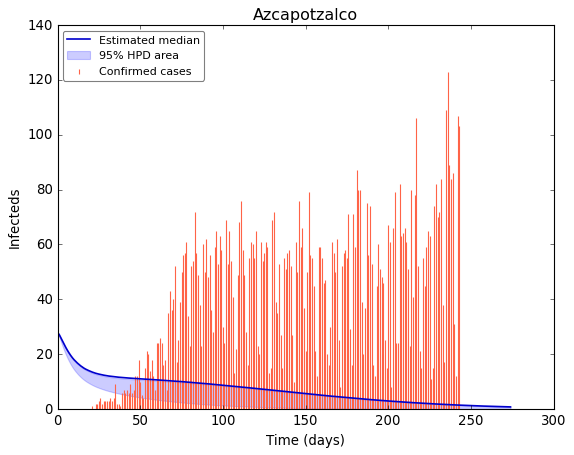

In [59]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[0,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[0,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[0,:], CriU_Ppc_I[0,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Azcapotzalco")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_Azcapotzalco.pdf')

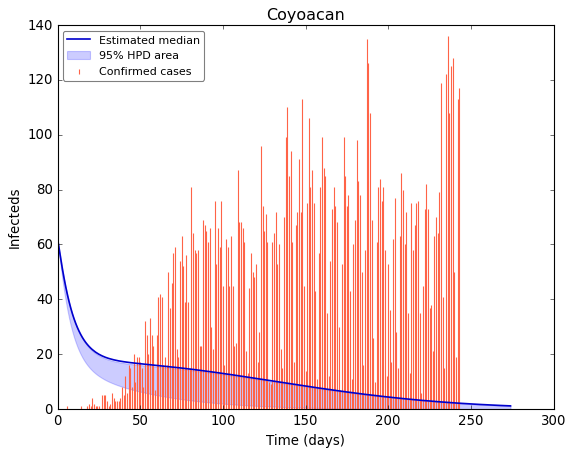

In [60]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[1,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[1,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[1,:], CriU_Ppc_I[1,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Coyoacan")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_Coyoacan.pdf')

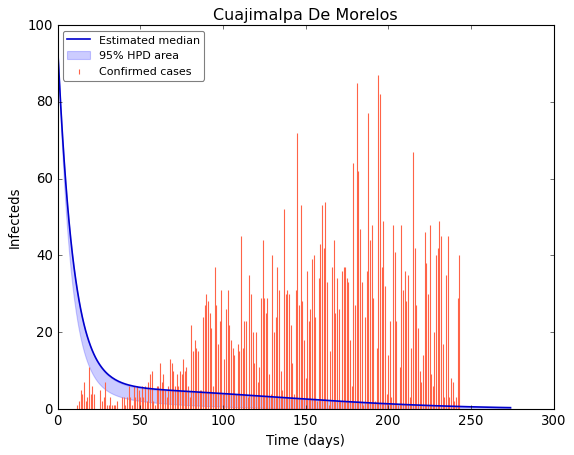

In [61]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[2,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[2,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[2,:], CriU_Ppc_I[2,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Cuajimalpa De Morelos")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_CuajimalpaDeMorelos.pdf')

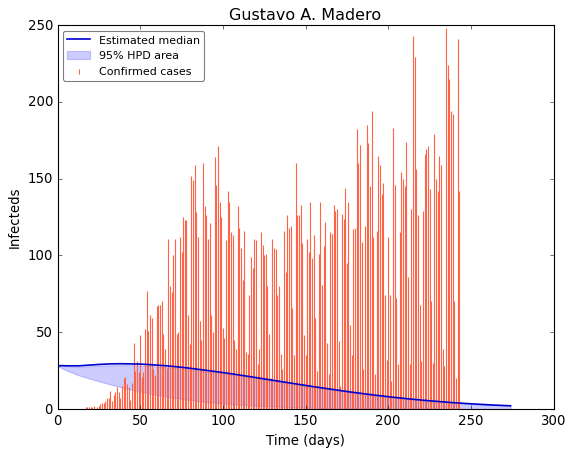

In [62]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[3,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[3,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[3,:], CriU_Ppc_I[3,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Gustavo A. Madero")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_GustavoAMadero.pdf')

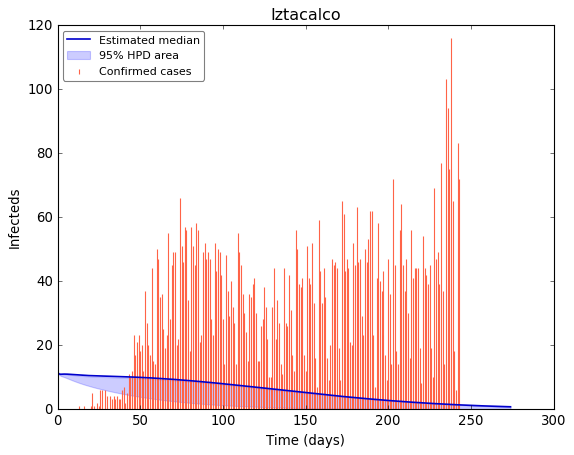

In [63]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[4,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[4,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[4,:], CriU_Ppc_I[4,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Iztacalco")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_Iztacalco.pdf')

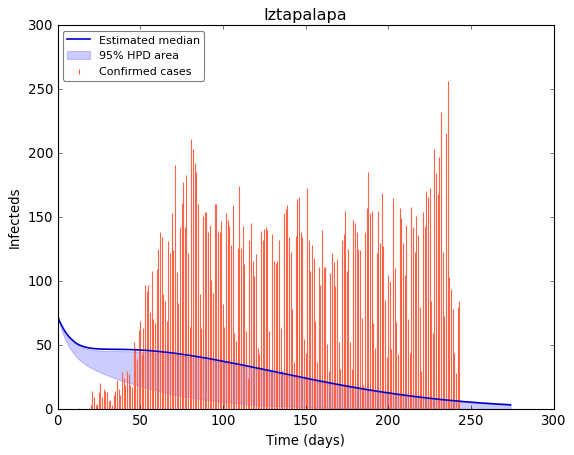

In [64]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[5,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[5,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[5,:], CriU_Ppc_I[5,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Iztapalapa")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_Iztapalapa.pdf')

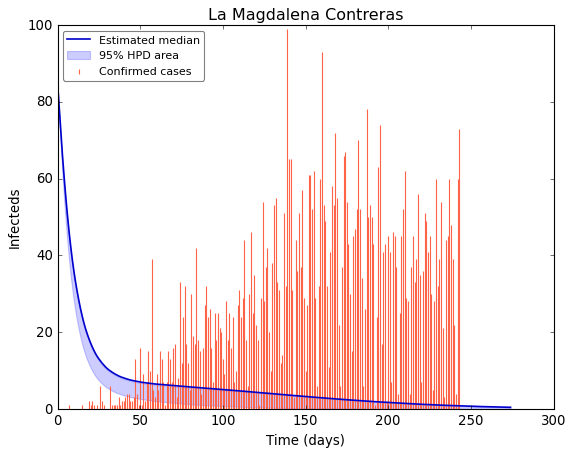

In [65]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[6,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[6,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[6,:], CriU_Ppc_I[6,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("La Magdalena Contreras")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_LaMagdalenaContreras.pdf')

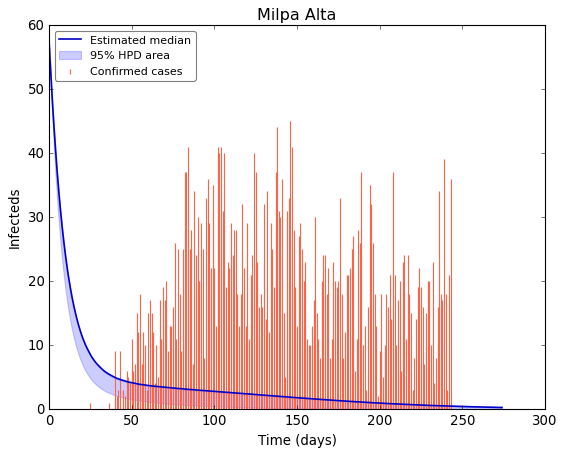

In [66]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[7,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[7,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[7,:], CriU_Ppc_I[7,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Milpa Alta")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_MilpaAlta.pdf')

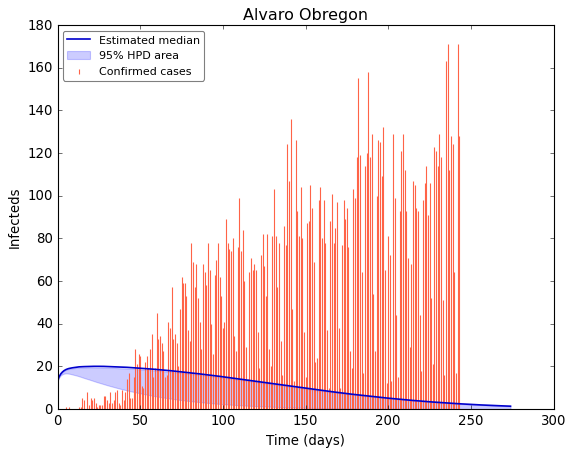

In [67]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[8,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[8,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[8,:], CriU_Ppc_I[8,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Alvaro Obregon")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_AlvaroObregon.pdf')

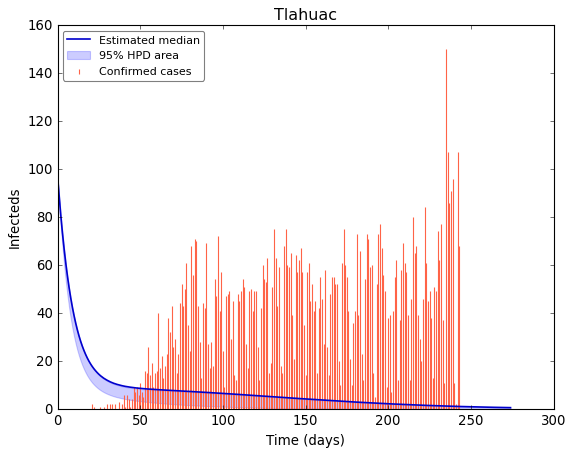

In [68]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[9,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[9,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[9,:], CriU_Ppc_I[9,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Tlahuac")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_Tlahuac.pdf')

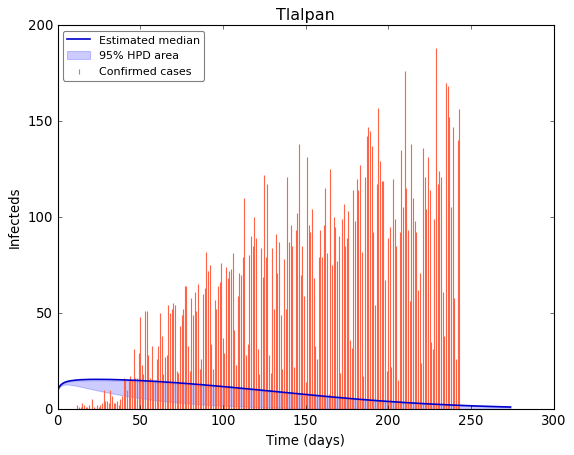

In [69]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[10,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[10,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[10,:], CriU_Ppc_I[10,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Tlalpan")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_Tlalpan.pdf')

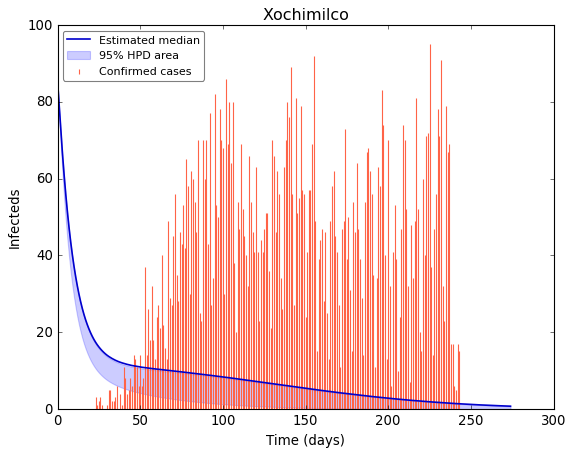

In [70]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[11,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[11,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[11,:], CriU_Ppc_I[11,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Xochimilco")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_Xochimilco.pdf')

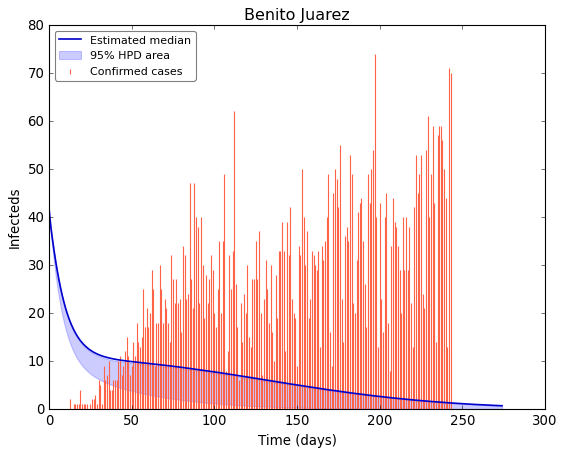

In [71]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[12,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[12,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[12,:], CriU_Ppc_I[12,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Benito Juarez")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_BenitoJuarez.pdf')

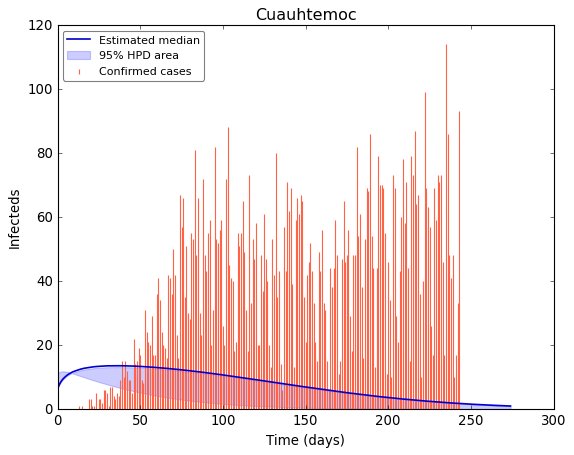

In [72]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[13,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[13,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[13,:], CriU_Ppc_I[13,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Cuauhtemoc")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_Cuauhtemoc.pdf')

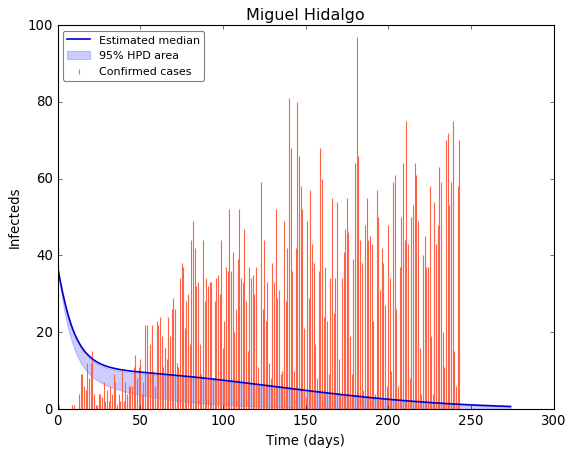

In [73]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[14,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[14,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[14,:], CriU_Ppc_I[14,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Miguel Hidalgo")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_MiguelHidalgo.pdf')

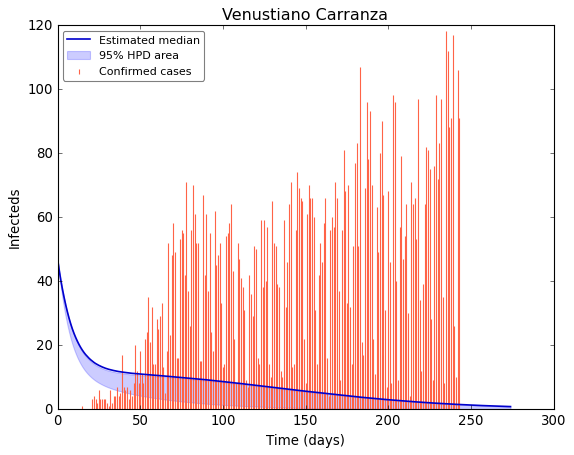

In [74]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[15,:]), linefmt='tomato', markerfmt=" ",
         basefmt=" ",label="Confirmed cases"  )
#ax2.plot(times_pred,median_ppc_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,my_Soln_I[15,:],color='mediumblue', lw=1.5,label='Estimated median')
ax2.fill_between(times_pred, CriL_Ppc_I[15,:], CriU_Ppc_I[15,:], color='blue', 
                 alpha=0.2, label='95% HPD area')
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_ylabel('Infecteds')  # Add an y-label to the axes.
ax2.set_title("Venustiano Carranza")  # Add a title to the axes.
ax2.legend(loc='upper left',fontsize='small',fancybox=True, framealpha=0.5,
           numpoints = 1 )   # Add a legend.
plt.savefig(save_results_to + 'BayesPrediction_I_VenustianoCarranza.pdf')

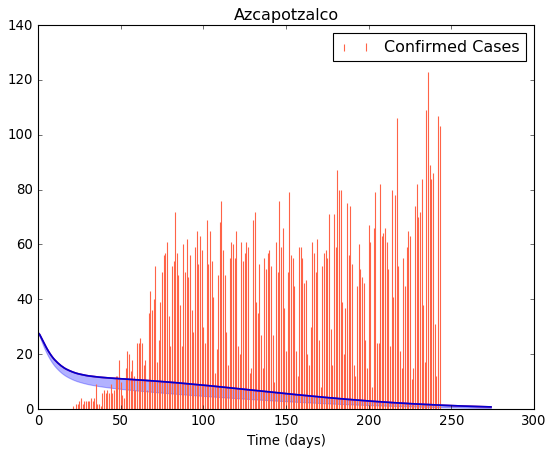

In [75]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[0,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[0,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[0,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[0,:], CriU_ppc_I[0,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Azcapotzalco")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_Azcapotzalco.pdf',dpi=400)

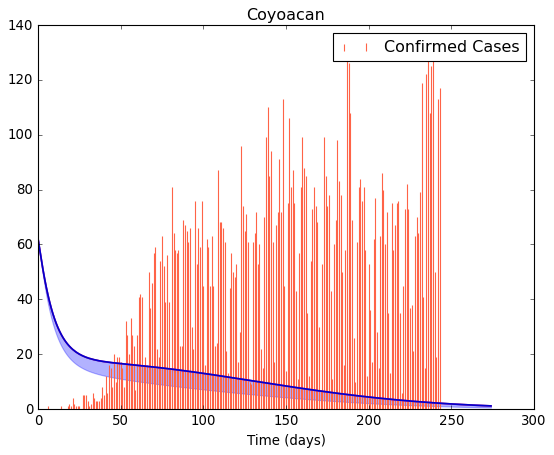

In [76]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[1,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[1,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[1,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[1,:], CriU_ppc_I[1,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Coyoacan")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_Coyoacan.pdf',dpi=400)

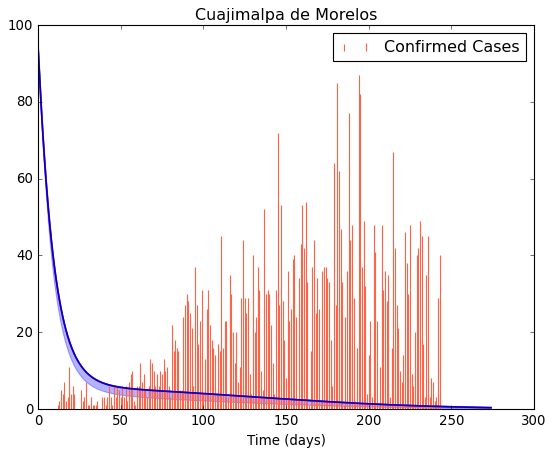

In [77]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[2,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[2,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[2,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[2,:], CriU_ppc_I[2,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Cuajimalpa de Morelos")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_CuajimalpaDeMorelos.pdf',dpi=400)

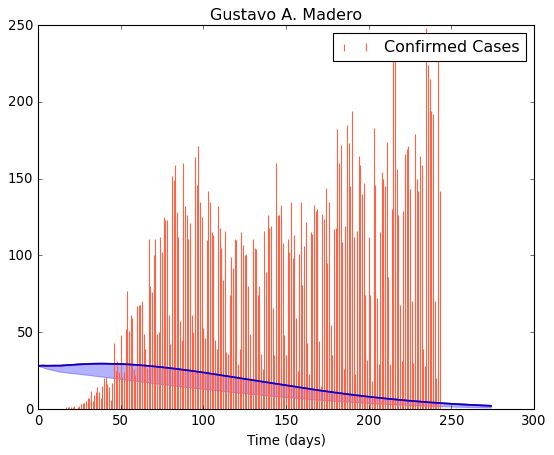

In [78]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[3,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[3,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[3,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[3,:], CriU_ppc_I[3,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Gustavo A. Madero")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_GustavoAMadero.pdf',dpi=400)

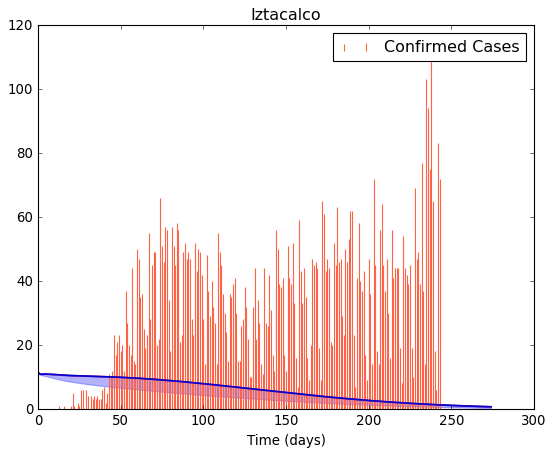

In [79]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[4,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[4,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[4,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[4,:], CriU_ppc_I[4,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Iztacalco")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_Iztacalco.pdf',dpi=400)

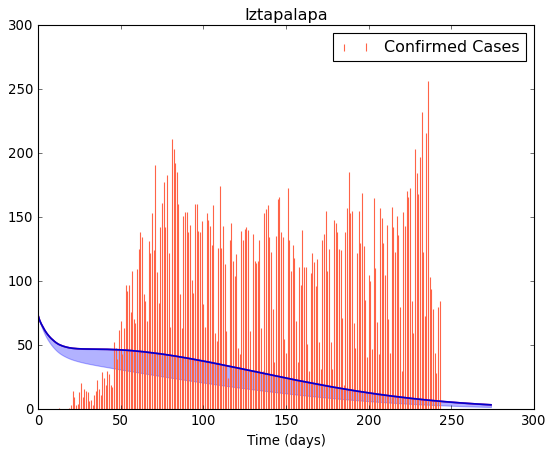

In [80]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[5,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[5,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[5,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[5,:], CriU_ppc_I[5,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Iztapalapa")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_Iztapalapa.pdf',dpi=400)

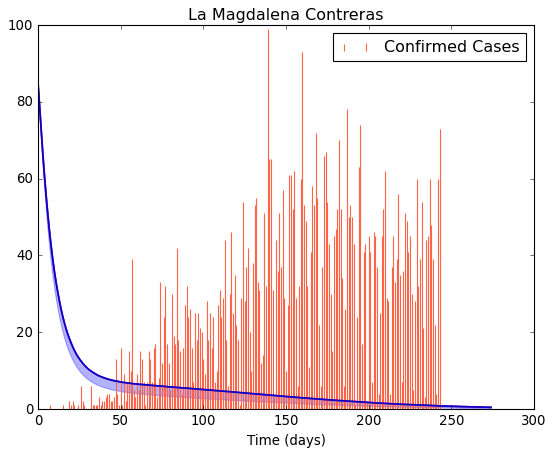

In [81]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[6,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[6,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[6,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[6,:], CriU_ppc_I[6,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("La Magdalena Contreras")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_LaMagdalenaContreras.pdf',dpi=400)

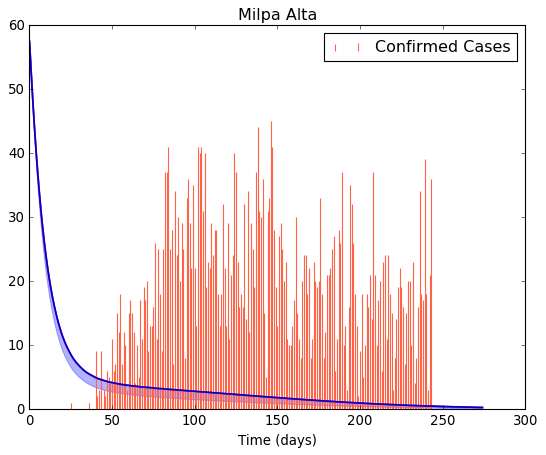

In [82]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[7,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[7,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[7,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[7,:], CriU_ppc_I[7,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Milpa Alta")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_MilpaAlta.pdf',dpi=400)

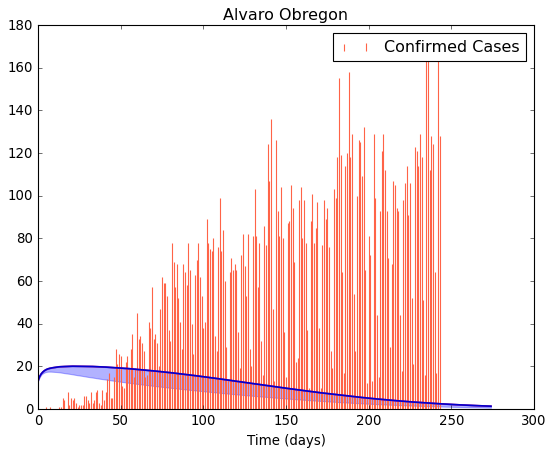

In [83]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[8,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[8,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[8,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[8,:], CriU_ppc_I[8,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Alvaro Obregon")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_AlvaroObregon.pdf',dpi=400)

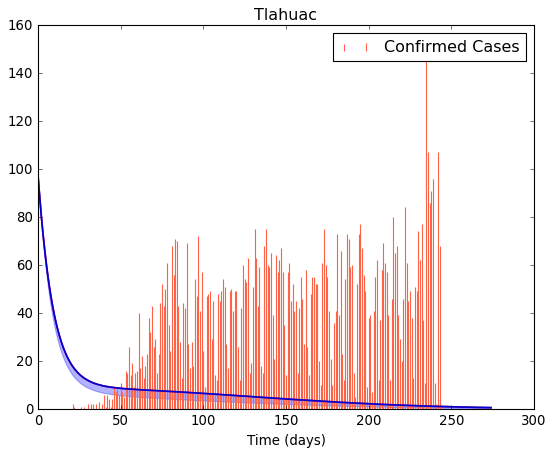

In [84]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[9,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[9,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[9,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[9,:], CriU_ppc_I[9,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Tlahuac")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_Tlahuac.pdf',dpi=400)

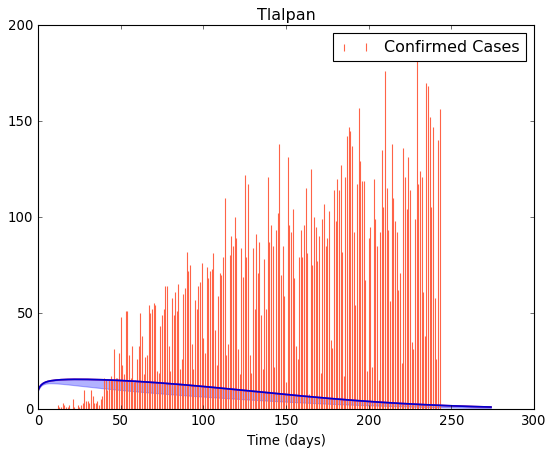

In [85]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[10,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[10,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[10,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[10,:], CriU_ppc_I[10,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Tlalpan")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_Tlalpan.pdf',dpi=400)

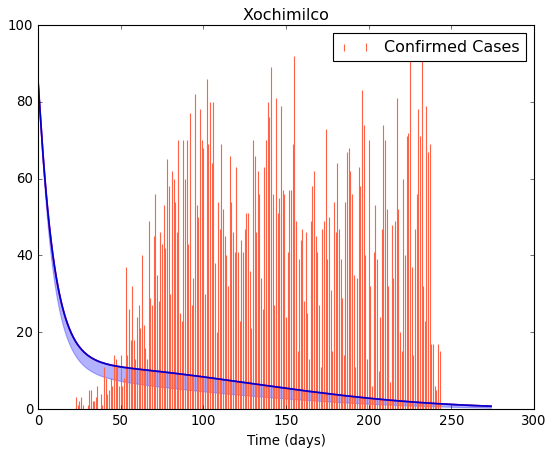

In [86]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[11,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[11,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[11,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[11,:], CriU_ppc_I[11,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Xochimilco")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_Xochimilco.pdf',dpi=400)

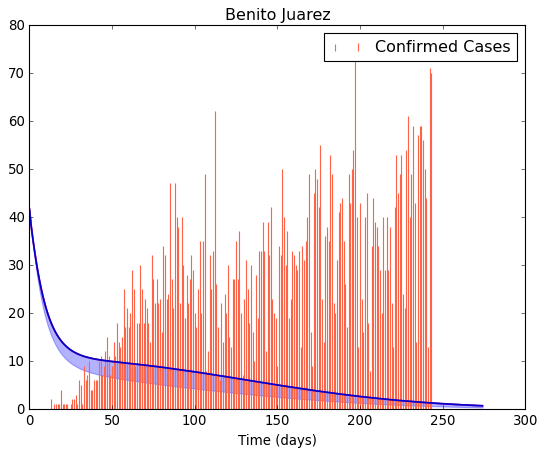

In [87]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[12,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[12,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[12,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[12,:], CriU_ppc_I[12,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Benito Juarez")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_BenitoJuarez.pdf',dpi=400)

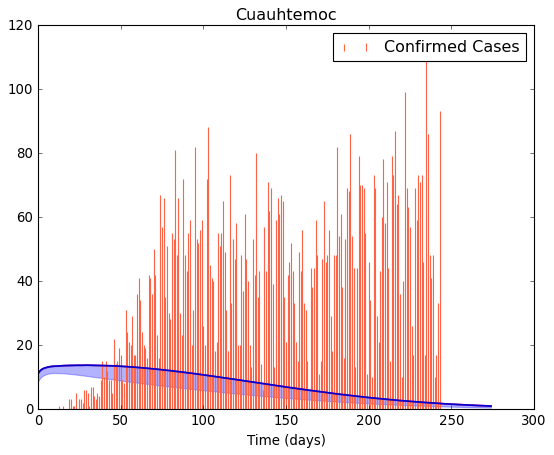

In [88]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[13,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[13,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[13,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[13,:], CriU_ppc_I[13,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Cuauhtemoc")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_Cuauhtemoc.pdf',dpi=400)

<ipython-input-89-dc743649bc42>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pdi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(save_results_to + 'BandsPrediction_I_MiguelHidalgo.pdf',pdi=400)


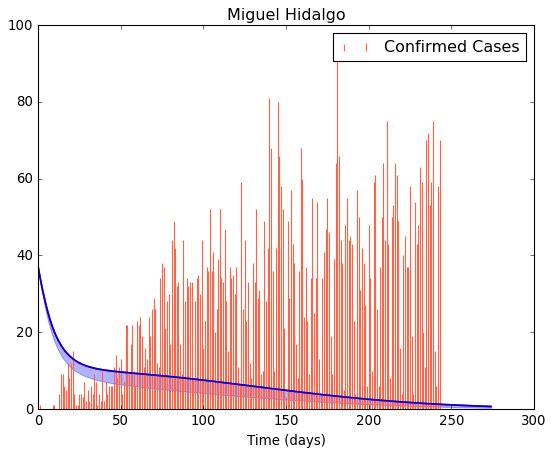

In [89]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[14,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[14,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[14,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[14,:], CriU_ppc_I[14,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Miguel Hidalgo")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_MiguelHidalgo.pdf',pdi=400)

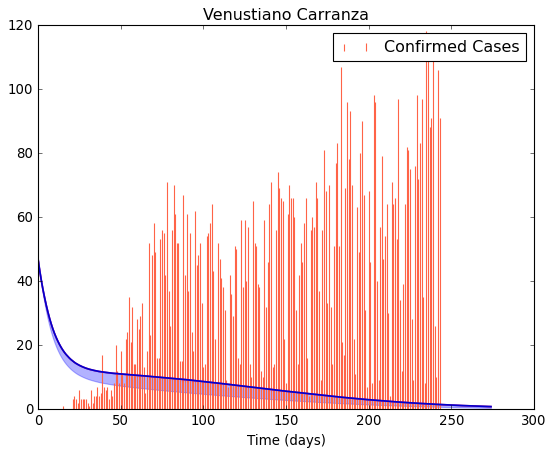

In [90]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[15,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
ax2.plot(times_pred,my_soln_I[15,:],color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[15,:],color='mediumblue', lw=1.5)
ax2.fill_between(times_pred, CriL_ppc_I[15,:], CriU_ppc_I[15,:], color='blue', alpha=0.3)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Venustiano Carranza")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPrediction_I_VenustianoCarranza.pdf',dpi=400)

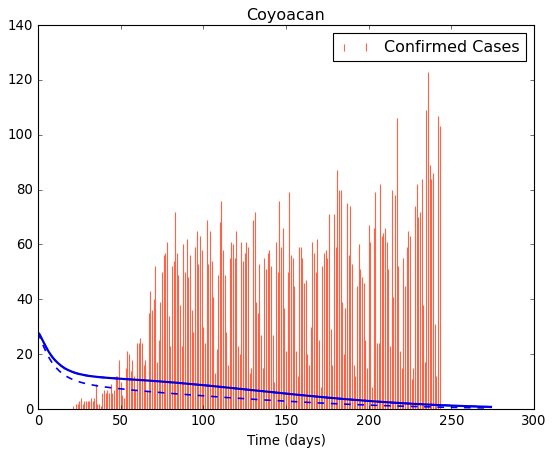

In [91]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[0,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[0,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[0,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[0,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Coyoacan")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_Coyoacan.pdf.pdf',dpi=400)

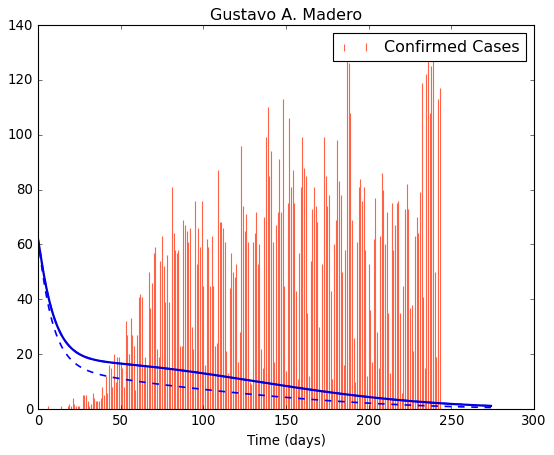

In [92]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[1,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[1,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[1,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[1,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Gustavo A. Madero")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_GustavoAMadero.pdf.pdf',dpi=400)

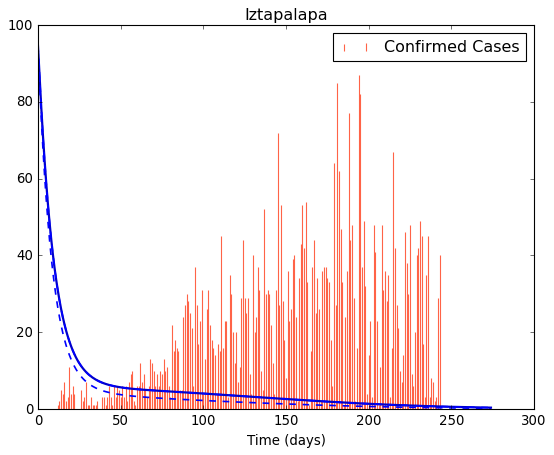

In [93]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[2,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[2,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[2,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[2,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Iztapalapa")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_Iztapalapa.pdf.pdf',dpi=400)

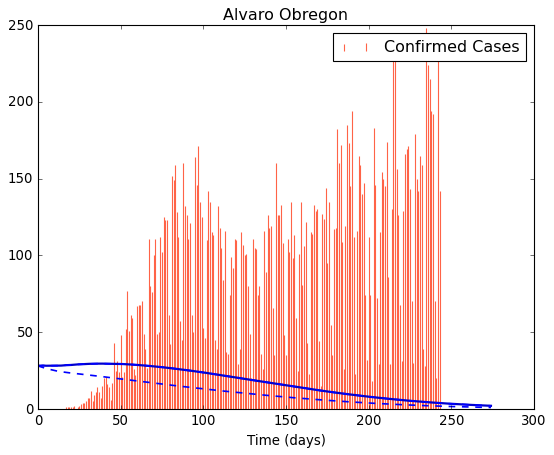

In [94]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[3,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[3,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[3,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[3,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Alvaro Obregon")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_AlvaroObregon.pdf.pdf',dpi=400)

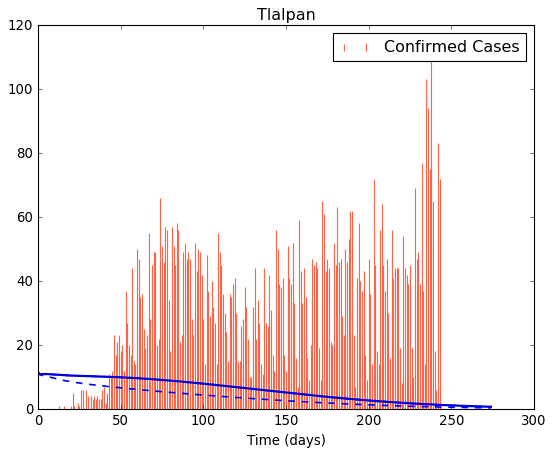

In [95]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[4,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[4,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[4,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[4,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Tlalpan")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_Tlalpan.pdf.pdf',dpi=400)

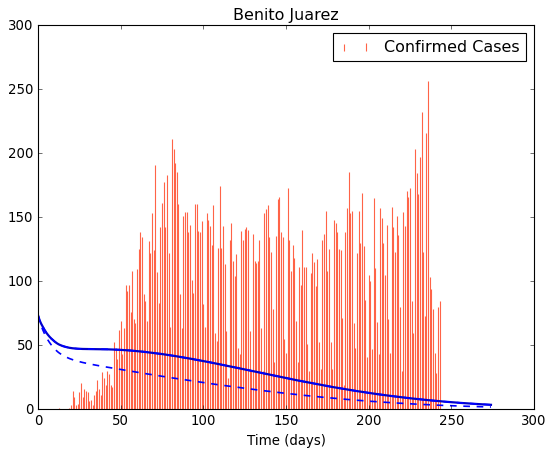

In [96]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[5,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[5,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[5,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[5,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Benito Juarez")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_BenitoJuarez.pdf.pdf',dpi=400)

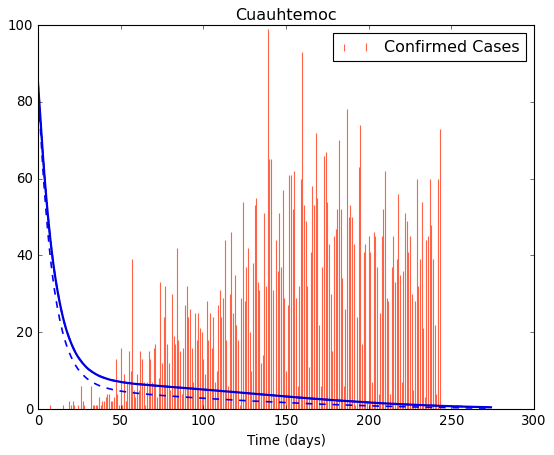

In [97]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[6,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[6,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[6,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[6,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Cuauhtemoc")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_Cuauhtemoc.pdf.pdf',dpi=400)

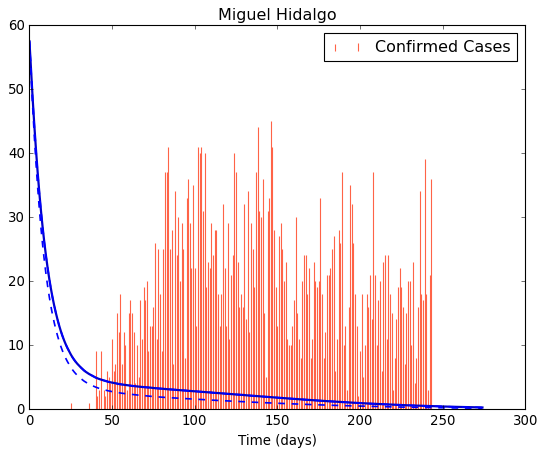

In [98]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[7,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[7,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[7,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[7,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Miguel Hidalgo")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_MiguelHidalgo.pdf.pdf',dpi=400)

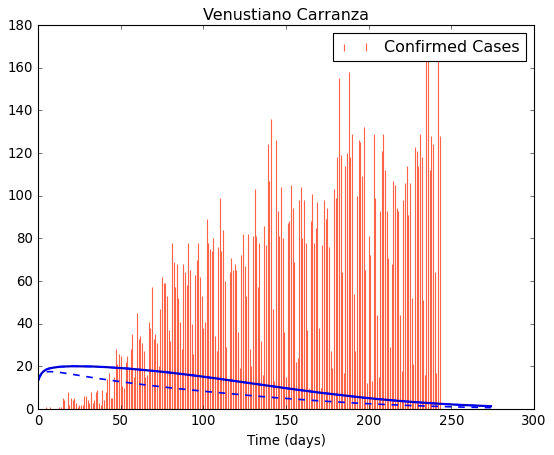

In [99]:
plt.figure(facecolor="white")
ax2 = plt.subplot(111)
ax2.stem(ttime, np.transpose(Sick[8,:]), linefmt='tomato', markerfmt=" ",basefmt=" ",label="Confirmed Cases"  )
#    ax2.plot(ttime,Sick,linestyle='dashed', marker='o', color='mediumblue',label="Confirmed Cases")
#ax2.plot(ttime,my_soln_I,color='mediumvioletred', lw=1.5)
ax2.plot(times_pred,median_ppc_I[8,:],color='mediumblue', lw=2)
plt.plot(times_pred,CriL_ppc_I[8,:], '--', color='b', lw=1.5)
plt.plot(times_pred,CriU_ppc_I[8,:], '--', color='b', lw=1.5)
#ax2.fill_between(times_pred, CriL_ppc[:,1], CriU_ppc[:,1], color='blue', alpha=0.2)
ax2.set_xlabel('Time (days)')  # Add an x-label to the axes.
ax2.set_title("Venustiano Carranza")  # Add a title to the axes.
ax2.legend()  # Add a legend.
plt.savefig(save_results_to + 'BandsPredictionI_VenustianoCarranza.pdf.pdf',dpi=400)

In [100]:
print(my_soln_I.shape)
print(median_ppc_I.shape)
print(CriL_ppc_I.shape)

(16, 275)
(16, 275)
(16, 275)


In [101]:
median_ppc_beta_s = np.median(samples[:,0],axis=0)
median_ppc_beta_a = np.median(samples[:,1],axis=0)
median_ppc_rho    = np.median(samples[:,2],axis=0)
median_ppc_alpha  = np.median(samples[:,3],axis=0)
median_ppc_gamma  = np.median(samples[:,4],axis=0)
median_ppc_theta  = np.median(samples[:,5],axis=0)
median_ppc_E0     = np.median(samples[:,6],axis=0)
median_ppc_A0     = np.median(samples[:,7],axis=0)
median_ppc_I0     = np.median(samples[:,8],axis=0)
median_ppc_omega0 = np.median(samples[:,9],axis=0)
median_ppc_E1     = np.median(samples[:,10],axis=0)
median_ppc_A1     = np.median(samples[:,11],axis=0)
median_ppc_I1     = np.median(samples[:,12],axis=0)
median_ppc_omega1 = np.median(samples[:,13],axis=0)
median_ppc_E2     = np.median(samples[:,14],axis=0)
median_ppc_A2     = np.median(samples[:,15],axis=0)
median_ppc_I2     = np.median(samples[:,16],axis=0)
median_ppc_omega2 = np.median(samples[:,17],axis=0)
median_ppc_E3     = np.median(samples[:,18],axis=0)
median_ppc_A3     = np.median(samples[:,19],axis=0)
median_ppc_I3     = np.median(samples[:,20],axis=0)
median_ppc_omega3 = np.median(samples[:,21],axis=0)
median_ppc_E4     = np.median(samples[:,22],axis=0)
median_ppc_A4     = np.median(samples[:,23],axis=0)
median_ppc_I4     = np.median(samples[:,24],axis=0)
median_ppc_omega4 = np.median(samples[:,25],axis=0)
median_ppc_E5     = np.median(samples[:,26],axis=0)
median_ppc_A5     = np.median(samples[:,27],axis=0)
median_ppc_I5     = np.median(samples[:,28],axis=0)
median_ppc_omega5 = np.median(samples[:,29],axis=0)
median_ppc_E6     = np.median(samples[:,30],axis=0)
median_ppc_A6     = np.median(samples[:,31],axis=0)
median_ppc_I6     = np.median(samples[:,32],axis=0)
median_ppc_omega6 = np.median(samples[:,33],axis=0)
median_ppc_E7     = np.median(samples[:,34],axis=0)
median_ppc_A7     = np.median(samples[:,35],axis=0)
median_ppc_I7     = np.median(samples[:,36],axis=0)
median_ppc_omega7 = np.median(samples[:,37],axis=0)
median_ppc_E8     = np.median(samples[:,38],axis=0)
median_ppc_A8     = np.median(samples[:,39],axis=0)
median_ppc_I8     = np.median(samples[:,40],axis=0)
median_ppc_omega8 = np.median(samples[:,41],axis=0)

In [102]:
CriL_ppc_beta_s   = np.percentile(samples[:,0],q=2.5,axis=0)
CriU_ppc_beta_s   = np.percentile(samples[:,0],q=97.5,axis=0)

CriL_ppc_beta_a   = np.percentile(samples[:,1],q=2.5,axis=0)
CriU_ppc_beta_a   = np.percentile(samples[:,1],q=97.5,axis=0)

CriL_ppc_rho      = np.percentile(samples[:,2],q=2.5,axis=0)
CriU_ppc_rho      = np.percentile(samples[:,2],q=97.5,axis=0)

CriL_ppc_alpha    = np.percentile(samples[:,3],q=2.5,axis=0)
CriU_ppc_alpha    = np.percentile(samples[:,3],q=97.5,axis=0)

CriL_ppc_gamma    = np.percentile(samples[:,4],q=2.5,axis=0)
CriU_ppc_gamma    = np.percentile(samples[:,4],q=97.5,axis=0)

CriL_ppc_theta    = np.percentile(samples[:,5],q=2.5,axis=0)
CriU_ppc_theta    = np.percentile(samples[:,5],q=97.5,axis=0)

CriL_ppc_E0      = np.percentile(samples[:,6],q=2.5,axis=0)
CriU_ppc_E0      = np.percentile(samples[:,6],q=97.5,axis=0)

CriL_ppc_A0      = np.percentile(samples[:,7],q=2.5,axis=0)
CriU_ppc_A0      = np.percentile(samples[:,7],q=97.5,axis=0)

CriL_ppc_I0      = np.percentile(samples[:,8],q=2.5,axis=0)
CriU_ppc_I0      = np.percentile(samples[:,8],q=97.5,axis=0)

CriL_ppc_omega0  = np.percentile(samples[:,9],q=2.5,axis=0)
CriU_ppc_omega0  = np.percentile(samples[:,9],q=97.5,axis=0)


CriL_ppc_E1     = np.percentile(samples[:,10],q=2.5,axis=0)
CriU_ppc_E1     = np.percentile(samples[:,10],q=97.5,axis=0)

CriL_ppc_A1     = np.percentile(samples[:,11],q=2.5,axis=0)
CriU_ppc_A1     = np.percentile(samples[:,11],q=97.5,axis=0)

CriL_ppc_I1     = np.percentile(samples[:,12],q=2.5,axis=0)
CriU_ppc_I1     = np.percentile(samples[:,12],q=97.5,axis=0)

CriL_ppc_omega1  = np.percentile(samples[:,13],q=2.5,axis=0)
CriU_ppc_omega1  = np.percentile(samples[:,13],q=97.5,axis=0)

CriL_ppc_E2     = np.percentile(samples[:,14],q=2.5,axis=0)
CriU_ppc_E2     = np.percentile(samples[:,14],q=97.5,axis=0)

CriL_ppc_A2     = np.percentile(samples[:,15],q=2.5,axis=0)
CriU_ppc_A2     = np.percentile(samples[:,15],q=97.5,axis=0)

CriL_ppc_I2     = np.percentile(samples[:,16],q=2.5,axis=0)
CriU_ppc_I2     = np.percentile(samples[:,16],q=97.5,axis=0)

CriL_ppc_omega2  = np.percentile(samples[:,17],q=2.5,axis=0)
CriU_ppc_omega2  = np.percentile(samples[:,17],q=97.5,axis=0)


CriL_ppc_E3     = np.percentile(samples[:,18],q=2.5,axis=0)
CriU_ppc_E3     = np.percentile(samples[:,18],q=97.5,axis=0)

CriL_ppc_A3     = np.percentile(samples[:,19],q=2.5,axis=0)
CriU_ppc_A3     = np.percentile(samples[:,19],q=97.5,axis=0)

CriL_ppc_I3     = np.percentile(samples[:,20],q=2.5,axis=0)
CriU_ppc_I3     = np.percentile(samples[:,20],q=97.5,axis=0)

CriL_ppc_omega3  = np.percentile(samples[:,21],q=2.5,axis=0)
CriU_ppc_omega3  = np.percentile(samples[:,21],q=97.5,axis=0)

CriL_ppc_E4     = np.percentile(samples[:,22],q=2.5,axis=0)
CriU_ppc_E4     = np.percentile(samples[:22],q=97.5,axis=0)

CriL_ppc_A4     = np.percentile(samples[:,23],q=2.5,axis=0)
CriU_ppc_A4     = np.percentile(samples[:,23],q=97.5,axis=0)

CriL_ppc_I4     = np.percentile(samples[:,24],q=2.5,axis=0)
CriU_ppc_I4     = np.percentile(samples[:,24],q=97.5,axis=0)

CriL_ppc_omega4  = np.percentile(samples[:,25],q=2.5,axis=0)
CriU_ppc_omega4  = np.percentile(samples[:,25],q=97.5,axis=0)


CriL_ppc_E5     = np.percentile(samples[:,26],q=2.5,axis=0)
CriU_ppc_E5     = np.percentile(samples[:,26],q=97.5,axis=0)

CriL_ppc_A5     = np.percentile(samples[:,27],q=2.5,axis=0)
CriU_ppc_A5     = np.percentile(samples[:,27],q=97.5,axis=0)

CriL_ppc_I5     = np.percentile(samples[:,28],q=2.5,axis=0)
CriU_ppc_I5     = np.percentile(samples[:,28],q=97.5,axis=0)

CriL_ppc_omega5  = np.percentile(samples[:,29],q=2.5,axis=0)
CriU_ppc_omega5  = np.percentile(samples[:,29],q=97.5,axis=0)

CriL_ppc_E6     = np.percentile(samples[:,30],q=2.5,axis=0)
CriU_ppc_E6     = np.percentile(samples[:,30],q=97.5,axis=0)

CriL_ppc_A6     = np.percentile(samples[:,31],q=2.5,axis=0)
CriU_ppc_A6     = np.percentile(samples[:,31],q=97.5,axis=0)

CriL_ppc_I6     = np.percentile(samples[:,32],q=2.5,axis=0)
CriU_ppc_I6     = np.percentile(samples[:,32],q=97.5,axis=0)

CriL_ppc_omega6  = np.percentile(samples[:,33],q=2.5,axis=0)
CriU_ppc_omega6  = np.percentile(samples[:,33],q=97.5,axis=0)


CriL_ppc_E7      = np.percentile(samples[:,34],q=2.5,axis=0)
CriU_ppc_E7      = np.percentile(samples[:,34],q=97.5,axis=0)

CriL_ppc_A7      = np.percentile(samples[:,35],q=2.5,axis=0)
CriU_ppc_A7      = np.percentile(samples[:,35],q=97.5,axis=0)

CriL_ppc_I7      = np.percentile(samples[:,36],q=2.5,axis=0)
CriU_ppc_I7      = np.percentile(samples[:,36],q=97.5,axis=0)

CriL_ppc_omega7  = np.percentile(samples[:,37],q=2.5,axis=0)
CriU_ppc_omega7  = np.percentile(samples[:,37],q=97.5,axis=0)

CriL_ppc_E8      = np.percentile(samples[:,38],q=2.5,axis=0)
CriU_ppc_E8      = np.percentile(samples[:,38],q=97.5,axis=0)

CriL_ppc_A8      = np.percentile(samples[:,39],q=2.5,axis=0)
CriU_ppc_A8      = np.percentile(samples[:,39],q=97.5,axis=0)

CriL_ppc_I8      = np.percentile(samples[:,40],q=2.5,axis=0)
CriU_ppc_I8      = np.percentile(samples[:,40],q=97.5,axis=0)

CriL_ppc_omega8  = np.percentile(samples[:,41],q=2.5,axis=0)
CriU_ppc_omega8  = np.percentile(samples[:,41],q=97.5,axis=0)

In [103]:
# Define the borders
q0    = samples[:,0]
q1    = samples[:,1]
q2    = samples[:,2]
q3    = samples[:,3]
q4    = samples[:,4]
q5    = samples[:,5]
e0    = samples[:,6]
a0    = samples[:,7]
i0    = samples[:,8]
w0    = samples[:,9]
e1    = samples[:,10]
a1    = samples[:,11]
i1    = samples[:,12]
w1    = samples[:,13]
e2    = samples[:,14]
a2    = samples[:,15]
i2    = samples[:,16]
w2    = samples[:,17]
e3    = samples[:,18]
a3    = samples[:,19]
i3    = samples[:,20]
w3    = samples[:,21]
e4    = samples[:,22]
a4    = samples[:,23]
i4    = samples[:,24]
w4    = samples[:,25]
e5    = samples[:,26]
a5    = samples[:,27]
i5    = samples[:,28]
w5    = samples[:,29]
e6    = samples[:,30]
a6    = samples[:,31]
i6    = samples[:,32]
w6    = samples[:,33]
e7    = samples[:,34]
a7    = samples[:,35]
i7    = samples[:,36]
w7    = samples[:,37]
e8    = samples[:,38]
a8    = samples[:,39]
i8    = samples[:,40]
w8    = samples[:,41]

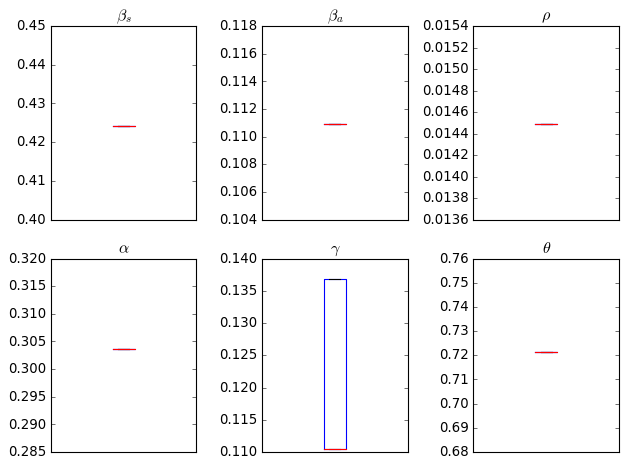

In [112]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].boxplot(q0,whis=(2.5,97.5), sym='')
axs[0, 0].set_title(r'$\beta_s$')
axs[0, 0].set_xticks([])

axs[0, 1].boxplot(q1,whis=(2.5,97.5), sym='')
axs[0, 1].set_title(r'$\beta_a$')
axs[0, 1].set_xticks([])

axs[0, 2].boxplot(q2,whis=(2.5,97.5), sym='')
axs[0, 2].set_title(r'$\rho$')
axs[0, 2].set_xticks([])

axs[1, 0].boxplot(q3,whis=(2.5,97.5), sym='')
axs[1, 0].set_title(r'$\alpha$')
axs[1, 0].set_xticks([])

axs[1, 1].boxplot(q4,whis=(2.5,97.5), sym='')
axs[1, 1].set_title(r'$\gamma$')
axs[1, 1].set_xticks([])

axs[1, 2].boxplot(q5,whis=(2.5,97.5), sym='')
axs[1, 2].set_title(r'$\theta$')
axs[1, 2].set_xticks([])
plt.tight_layout()
fig.set(facecolor = "white")
plt.savefig(save_results_to+'Box_Params.eps')

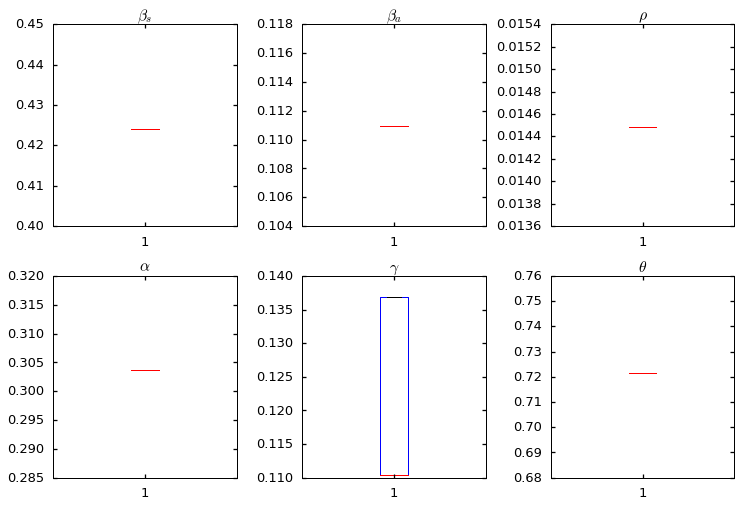

In [108]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
fig, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(q0,whis=(2.5,97.5), sym='')
axs[0, 0].set_title(r'$\beta_s$')

axs[0, 1].boxplot(q1,whis=(2.5,97.5), sym='')
axs[0, 1].set_title(r'$\beta_a$')

axs[0, 2].boxplot(q2,whis=(2.5,97.5), sym='')
axs[0, 2].set_title(r'$\rho$')

axs[1, 0].boxplot(q3,whis=(2.5,97.5), sym='')
axs[1, 0].set_title(r'$\alpha$')

axs[1, 1].boxplot(q4,whis=(2.5,97.5), sym='')
axs[1, 1].set_title(r'$\gamma$')

axs[1, 2].boxplot(q5,whis=(2.5,97.5), sym='')
axs[1, 2].set_title(r'$\theta$')
plt.tight_layout()
plt.savefig(save_results_to+'Box_Params.pdf')

In [110]:
sampleT = pd.DataFrame(samples[:,0:6], 
                       columns=["beta_s", "beta_a","rho","alpha", "gamma","theta" ])

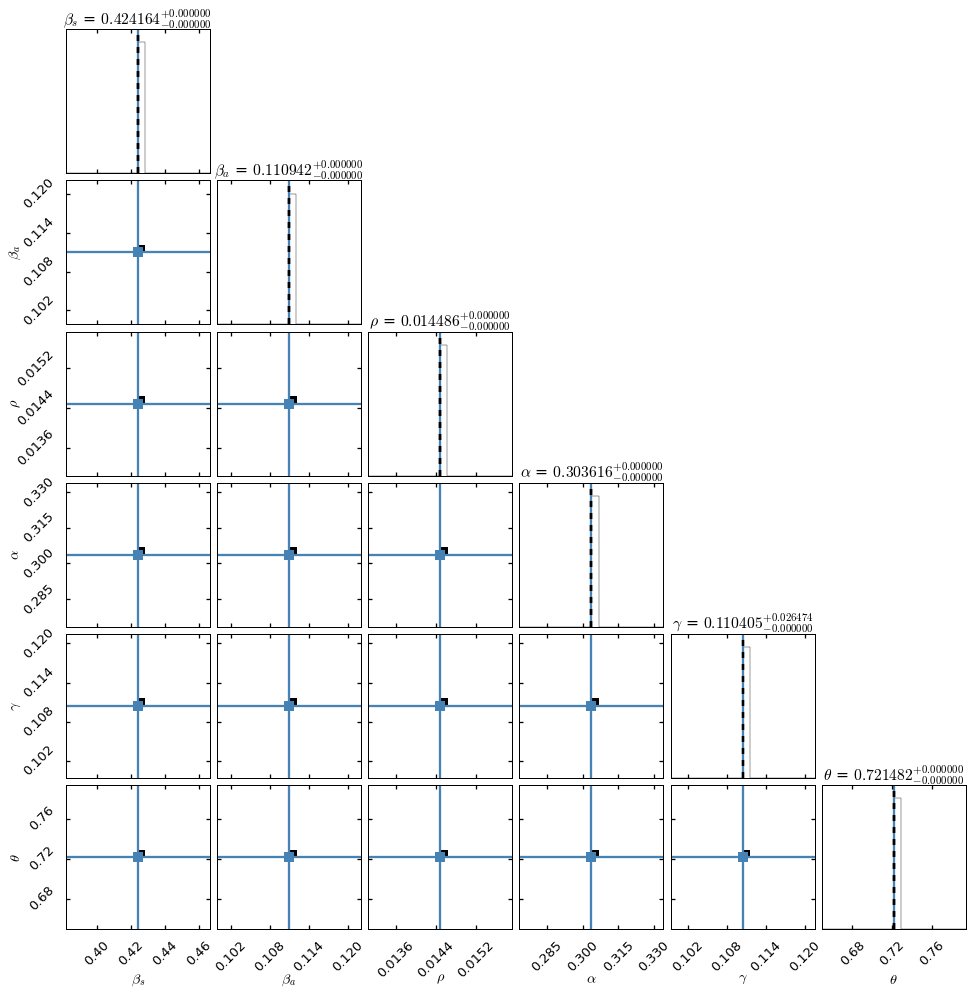

In [115]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
varnames=[r"$\beta_{s}$", r"$\beta_{a}$" , r"$\rho$"  , r"$\alpha$", r"$\gamma$" ,
          r"$\theta$"]


map = qq[0,0:6]

range = np.array([(0.9*x,1.1*x) for x in map])
#corner.corner(samples,show_titles=True,labels=varnames,
#                  quantiles=[0.025, 0.5, 0.975],
#                  truths=map,range=range)
corner.corner(sampleT,show_titles=True,labels=varnames,truths=map,range=range,
                plot_datapoints=False,quantiles=[0.025, 0.5, 0.975],
                title_fmt='.6f')
plt.savefig(save_results_to + 'corner.pdf')

LinAlgError: singular matrix

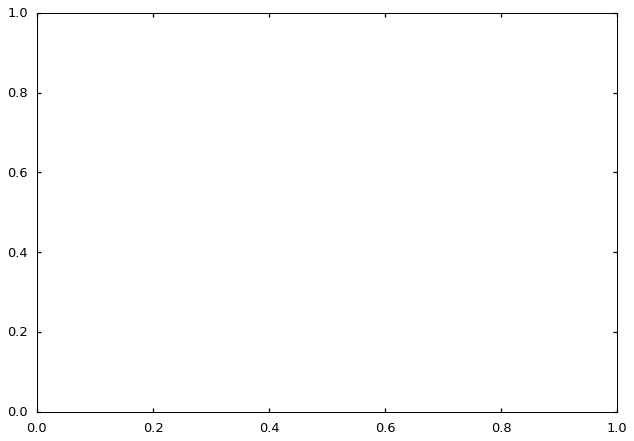

In [116]:
plt.figure()
sns.kdeplot(data=q0)
#    plt.axvline(x=CriL_ppc_beta_s,color='r',linestyle="--")
#    plt.axvline(x=CriU_ppc_beta_s,color='r',linestyle="--")
x_values = [CriL_ppc_beta_s, CriU_ppc_beta_s]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)   
plt.savefig(save_results_to + 'BayesianInterval-beta_s.eps')

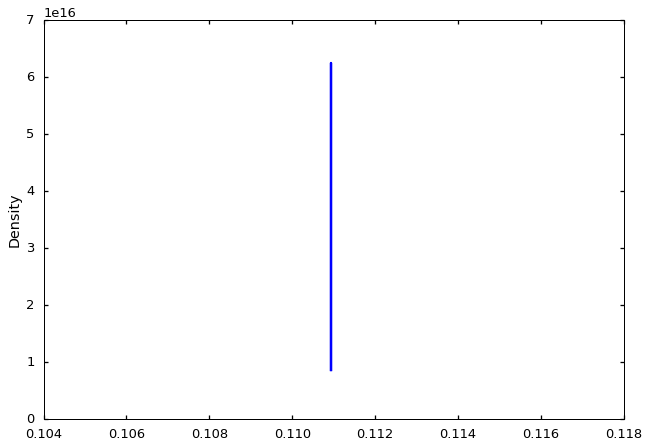

In [117]:
plt.figure()
sns.kdeplot(data=q1)
x_values = [CriL_ppc_beta_a, CriU_ppc_beta_a]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)  
plt.savefig(save_results_to + 'BayesianInterval-beta_a.eps')

LinAlgError: singular matrix

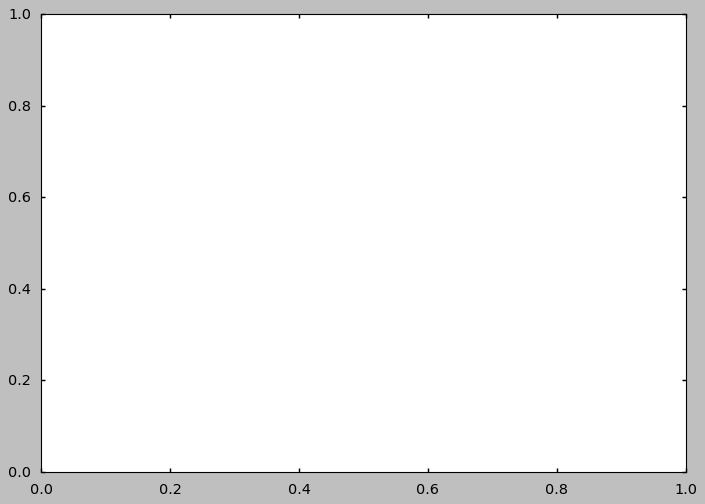

In [106]:
plt.figure()
sns.kdeplot(data=q2)
x_values = [CriL_ppc_rho, CriU_ppc_rho]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-rho.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=q3)
x_values = [CriL_ppc_alpha, CriU_ppc_alpha]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-alpha.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=q4)
x_values = [CriL_ppc_gamma, CriU_ppc_gamma]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-gamma.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=q5)
x_values = [CriL_ppc_theta, CriU_ppc_theta]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-theta.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w0)
x_values = [CriL_ppc_omega0, CriU_ppc_omega0]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega0.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w1)
x_values = [CriL_ppc_omega1, CriU_ppc_omega1]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega1.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w2)
x_values = [CriL_ppc_omega2, CriU_ppc_omega2]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega2.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w3)
x_values = [CriL_ppc_omega3, CriU_ppc_omega3]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega3.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w4)
x_values = [CriL_ppc_omega4, CriU_ppc_omega4]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega4.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w5)
x_values = [CriL_ppc_omega5, CriU_ppc_omega5]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega5.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w6)
x_values = [CriL_ppc_omega6, CriU_ppc_omega6]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega6.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w7)
x_values = [CriL_ppc_omega7, CriU_ppc_omega7]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega7.eps')

In [ ]:
plt.figure()
sns.kdeplot(data=w8)
x_values = [CriL_ppc_omega8, CriU_ppc_omega8]
y_values = [0, 0]
plt.plot(x_values, y_values,color='k', lw=6)    
plt.savefig(save_results_to +  'BayesianInterval-omega8.eps')

In [ ]:
#import dill
#dill.load_session('CovidMobilityAllCDMX1.db')